# **Libraries**

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Penjelasan Kolom Dataset**

---



**Pregnancies**: Untuk menyatakan jumlah kehamilan

**Glucose (mg/dL)**: Untuk menyatakan kadar glukosa dalam darah

**BloodPressure (mmHg)**: Untuk menyatakan pengukuran tekanan darah

**SkinThickness (mm)**: Untuk menyatakan ketebalan kulit

**Insulin (µIU/mL)**: Untuk menyatakan kadar insulin dalam darah

**BMI**: Untuk menyatakan indeks massa tubuh

**DiabetesPedigreeFunction**: Untuk menyatakan persentase faktor internal diabetes

**Age**: Untuk menyatakan usia

**Outcome**: Untuk menyatakan hasil akhir, 1 adalah Ya dan 0 adalah Tidak

# **Data Understanding**

In [251]:
df=pd.read_csv("diabetes.csv")
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [253]:
df.shape

(768, 9)

In [254]:
df.duplicated().sum()

0

In [255]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [256]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

# **Data Cleaning**

In [257]:
df = df.rename(columns={
    'Pregnancies': 'kehamilan',
    'Glucose': 'glukosa',
    'SkinThickness': 'TebalKulit',
    'DiabetesPedigreeFunction': 'PersenDiabet',
    'Age': 'usia',
    'Outcome': 'hasil'
})
df.head()

kehamilan  glukosa  BloodPressure  TebalKulit  Insulin   BMI  PersenDiabet  \
0          6      148             72          35        0  33.6         0.627   
1          1       85             66          29        0  26.6         0.351   
2          8      183             64           0        0  23.3         0.672   
3          1       89             66          23       94  28.1         0.167   
4          0      137             40          35      168  43.1         2.288   

   usia  hasil  
0    50      1  
1    31      0  
2    32      1  
3    21      0  
4    33      1

In [258]:
df_0 = df[df['hasil'] == 0]
df_1 = df[df['hasil'] == 1]

num_to_remove = len(df_0) - len(df_1)

df_0_balanced = df_0.sample(n=len(df_1), random_state=42)

df_balanced = pd.concat([df_0_balanced, df_1])

print(df_balanced['hasil'].value_counts())

df = df_balanced

hasil
0    268
1    268
Name: count, dtype: int64


# **Exploratory Data Analysis**

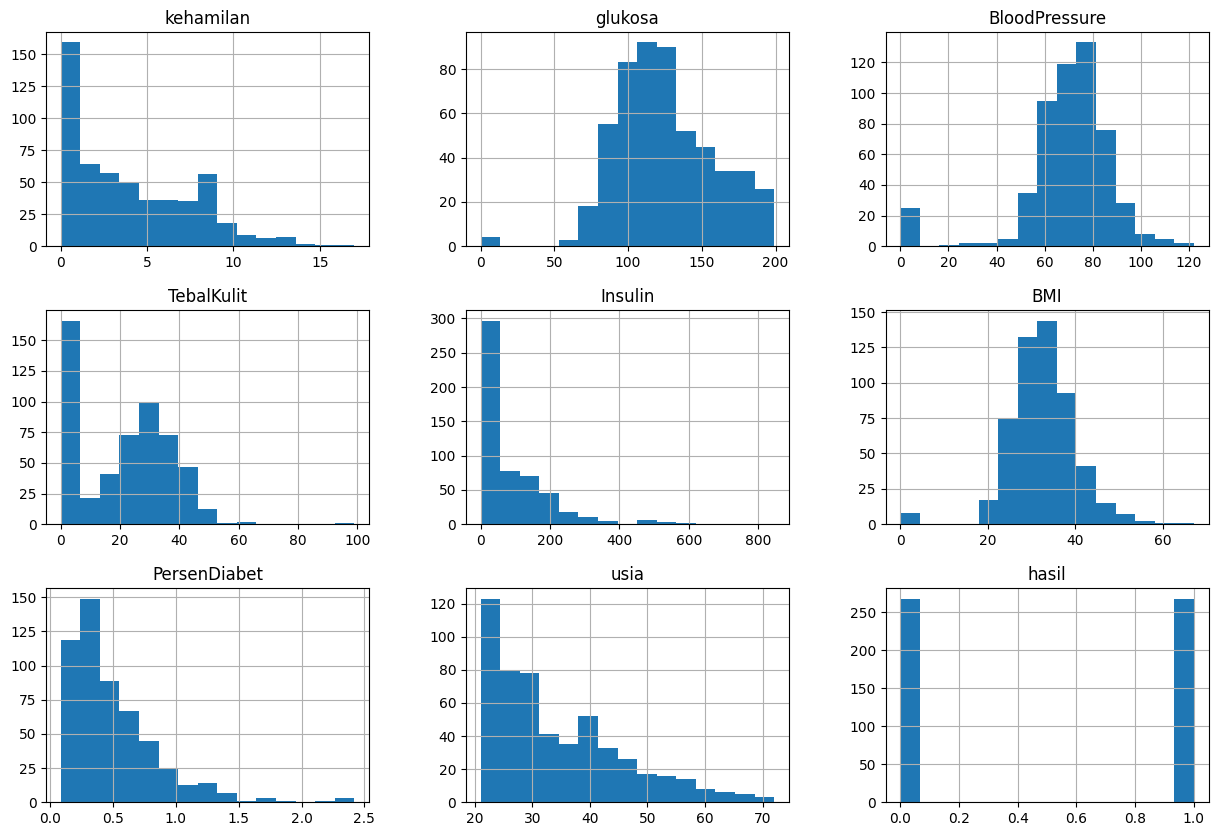

In [259]:
df.hist(figsize=(15, 10), bins=15)
plt.show()

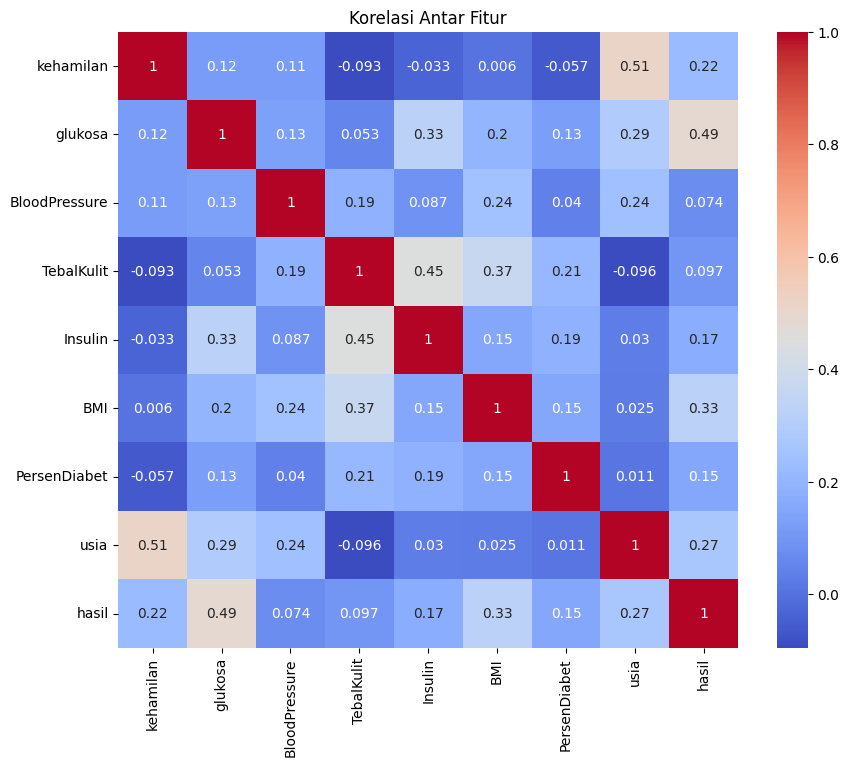

In [260]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur')
plt.show()

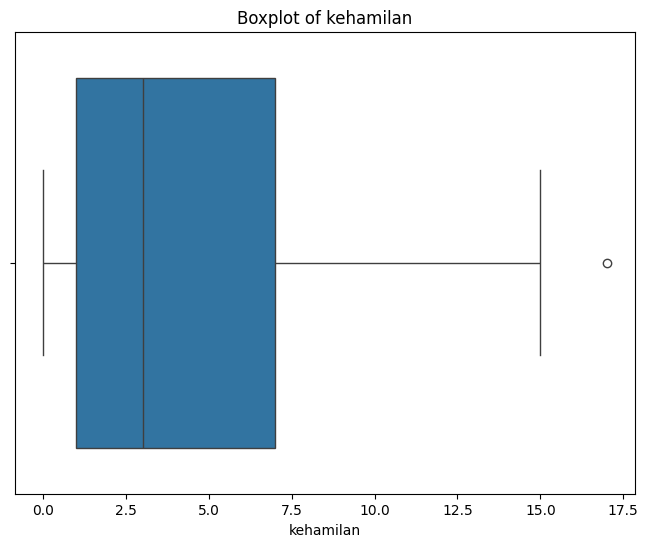

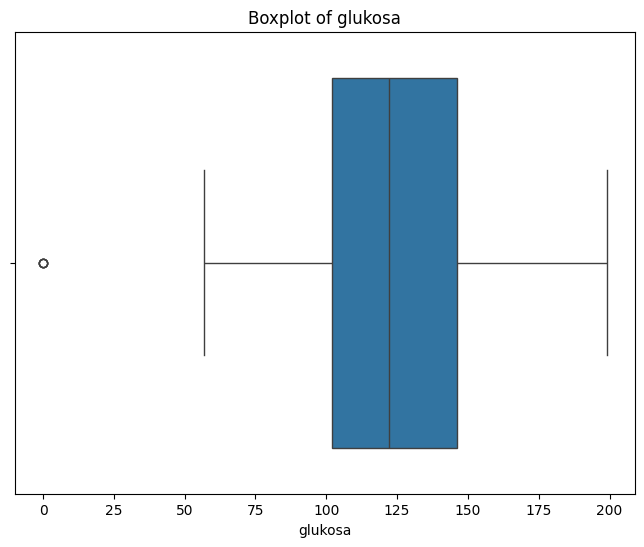

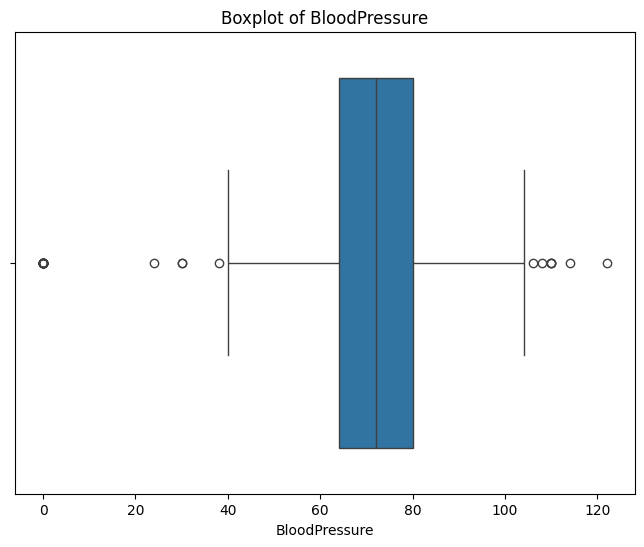

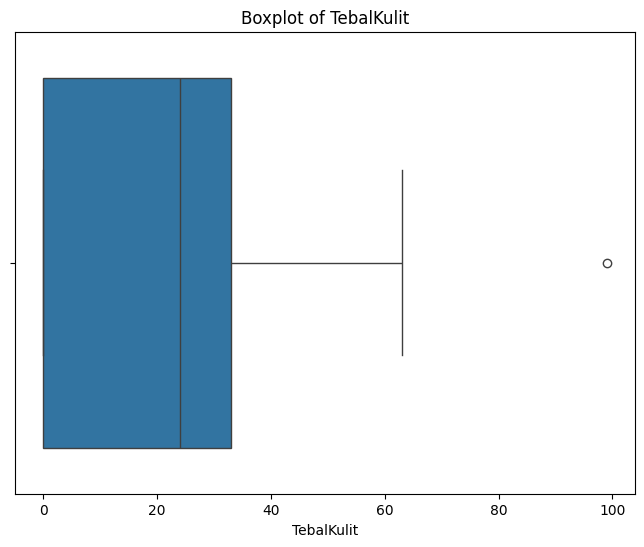

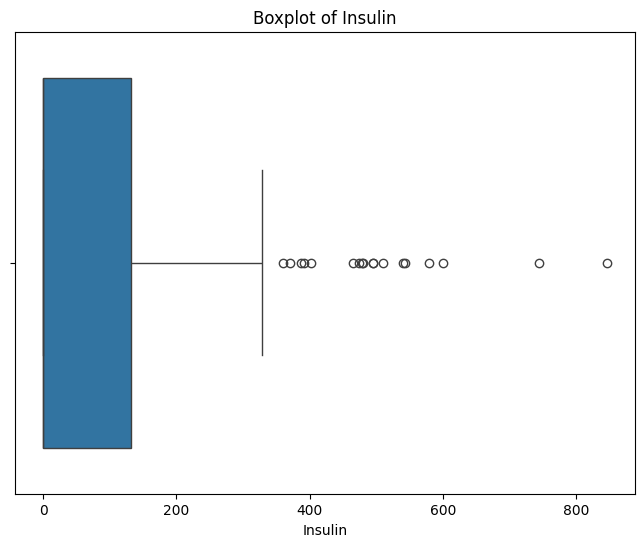

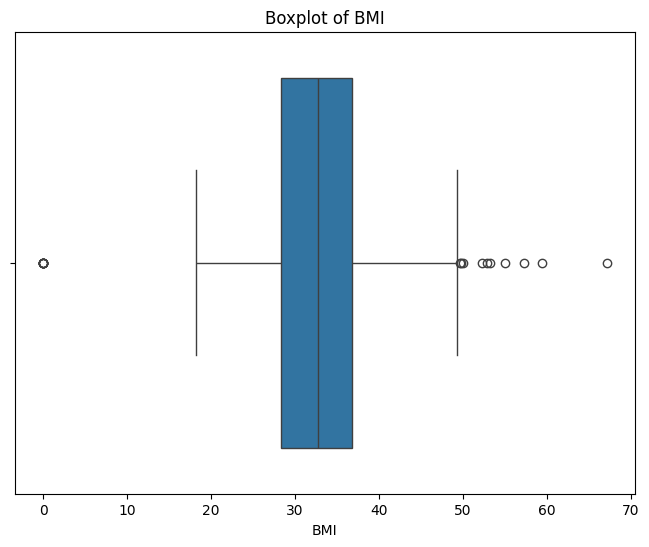

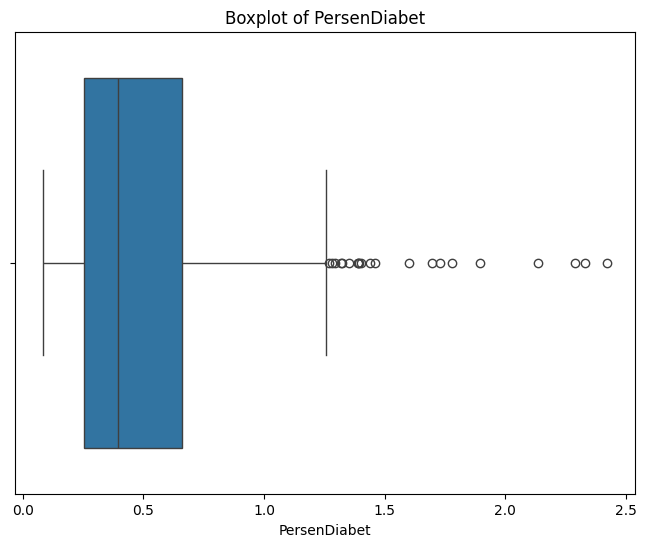

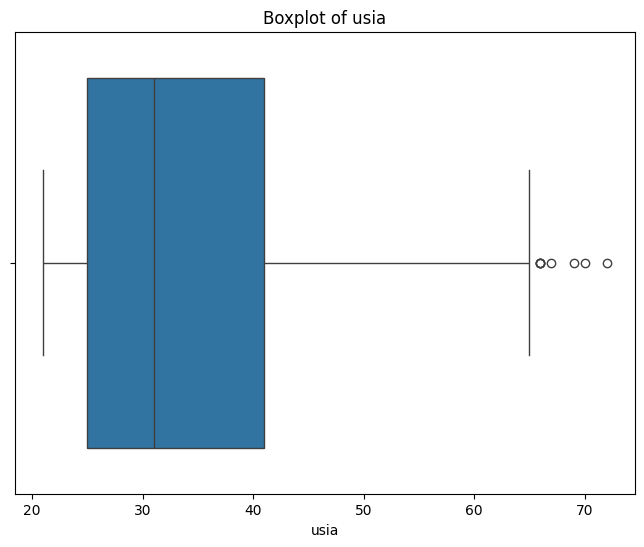

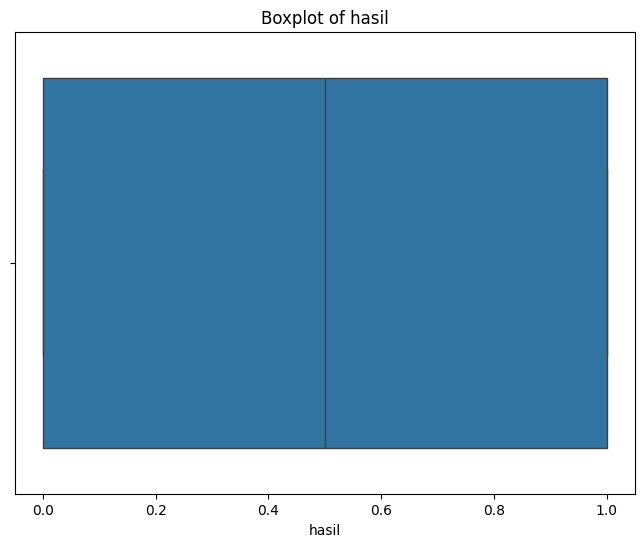

In [261]:
for column in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

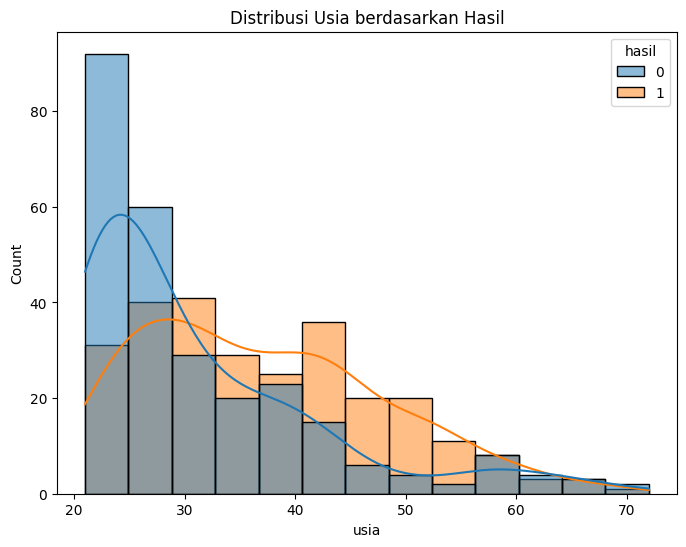

In [262]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='usia', hue='hasil', kde=True)
plt.title('Distribusi Usia berdasarkan Hasil')
plt.show()

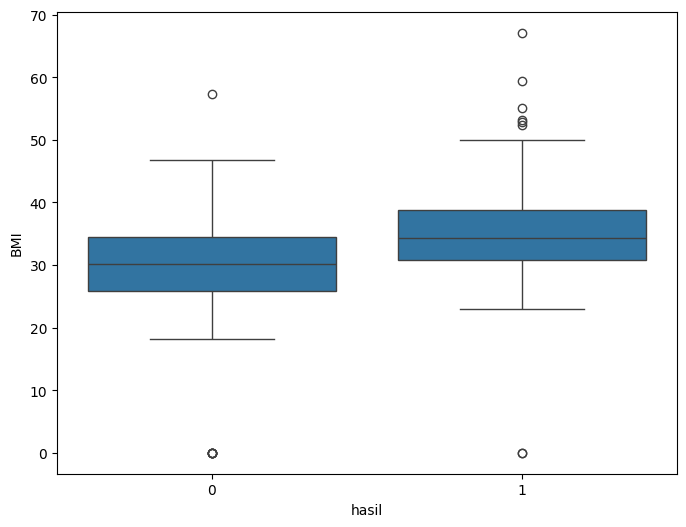

In [263]:
plt.figure(figsize=(8,6))
sns.boxplot(x='hasil',y='BMI',data=df)
plt.show()

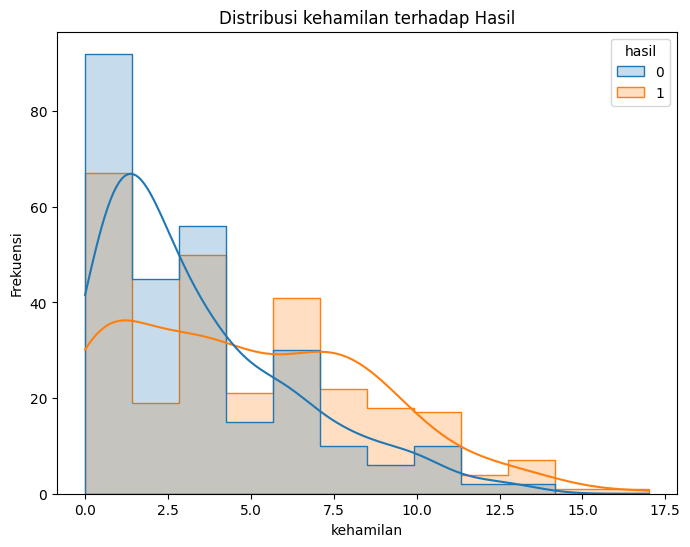

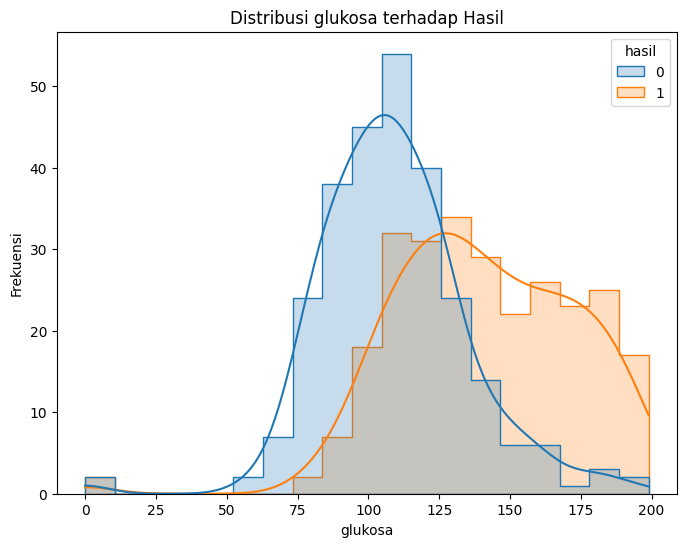

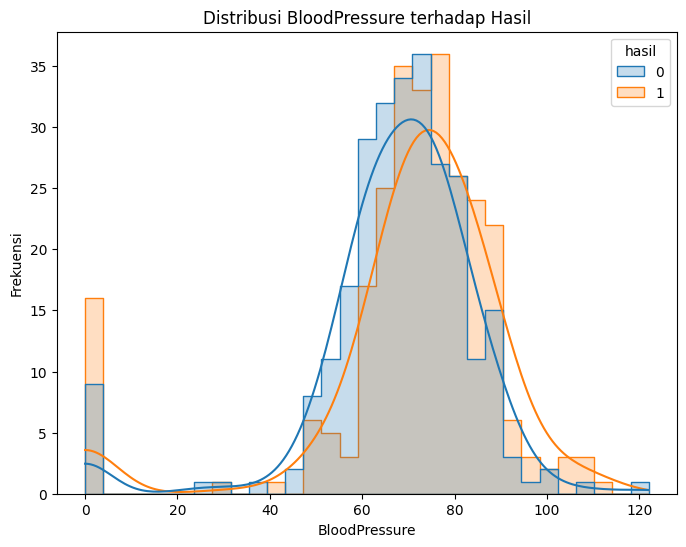

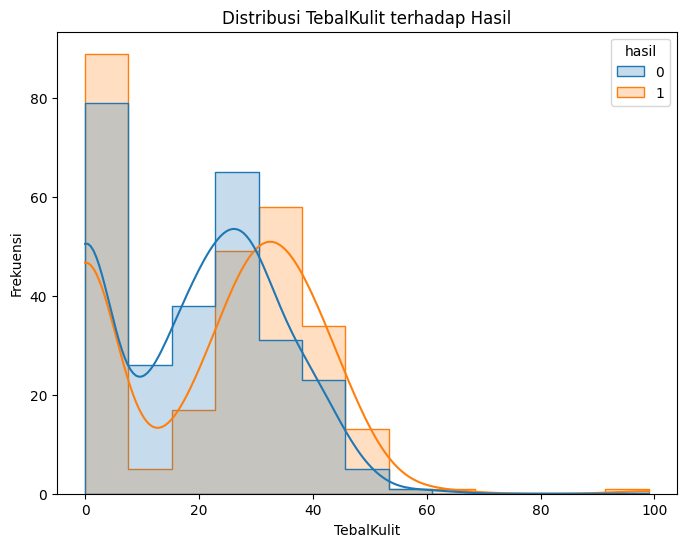

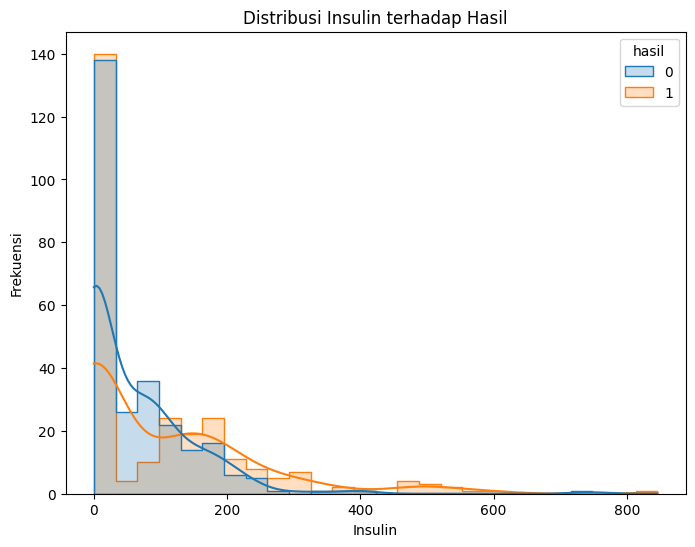

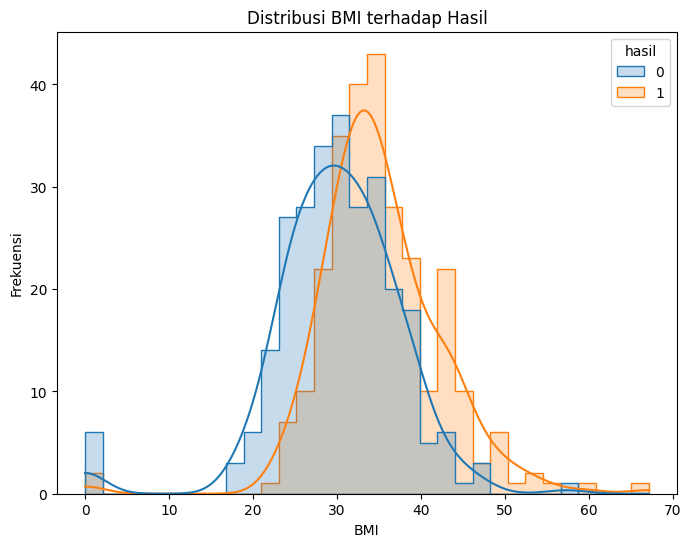

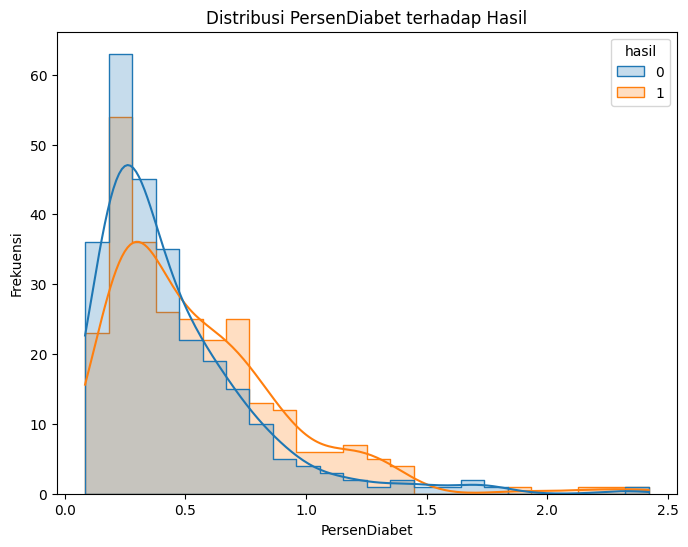

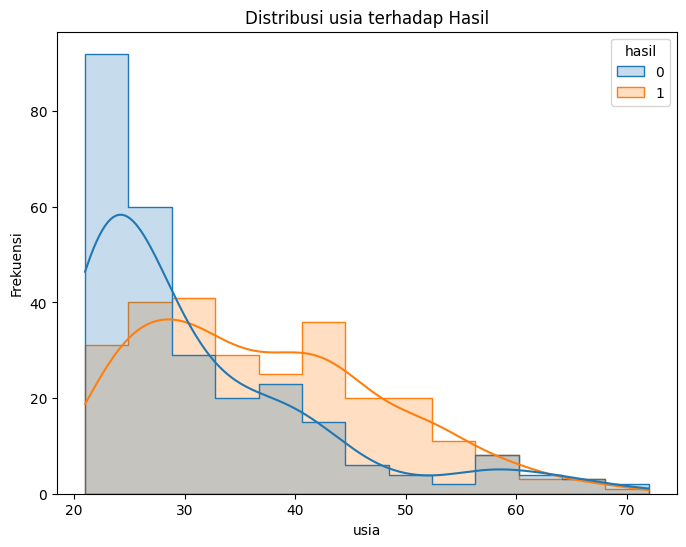

In [264]:
for col in df.columns[:-1]:  # Iterate through all columns except 'hasil'
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue='hasil', kde=True, element="step") # Use element="step" for better visualization
    plt.title(f'Distribusi {col} terhadap Hasil')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()

# **Data Preparation**

In [265]:
# prompt: hitung jumlah data outlier

# Function to count outliers using IQR
def count_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return len(outliers)

# Count outliers for each numerical column
for column in df.select_dtypes(include=np.number).columns:
  outlier_count = count_outliers_iqr(df[column])
  print(f"Jumlah outlier pada kolom {column}: {outlier_count}")

Jumlah outlier pada kolom kehamilan: 1
Jumlah outlier pada kolom glukosa: 4
Jumlah outlier pada kolom BloodPressure: 36
Jumlah outlier pada kolom TebalKulit: 1
Jumlah outlier pada kolom Insulin: 18
Jumlah outlier pada kolom BMI: 18
Jumlah outlier pada kolom PersenDiabet: 21
Jumlah outlier pada kolom usia: 8
Jumlah outlier pada kolom hasil: 0


In [266]:
def handle_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers instead of removing them
    data = np.where(data < lower_bound, lower_bound, data)
    data = np.where(data > upper_bound, upper_bound, data)
    return data

# Handle outliers for each numerical column
for column in df.select_dtypes(include=np.number).columns:
    df[column] = handle_outliers_iqr(df[column])

# Verify the changes (optional)
for column in df.select_dtypes(include=np.number).columns:
    outlier_count = count_outliers_iqr(df[column])  # Use your existing function
    print(f"Jumlah outlier pada kolom {column}: {outlier_count}")

Jumlah outlier pada kolom kehamilan: 0
Jumlah outlier pada kolom glukosa: 0
Jumlah outlier pada kolom BloodPressure: 0
Jumlah outlier pada kolom TebalKulit: 0
Jumlah outlier pada kolom Insulin: 0
Jumlah outlier pada kolom BMI: 0
Jumlah outlier pada kolom PersenDiabet: 0
Jumlah outlier pada kolom usia: 0
Jumlah outlier pada kolom hasil: 0


# **Modelling & Evaluation**

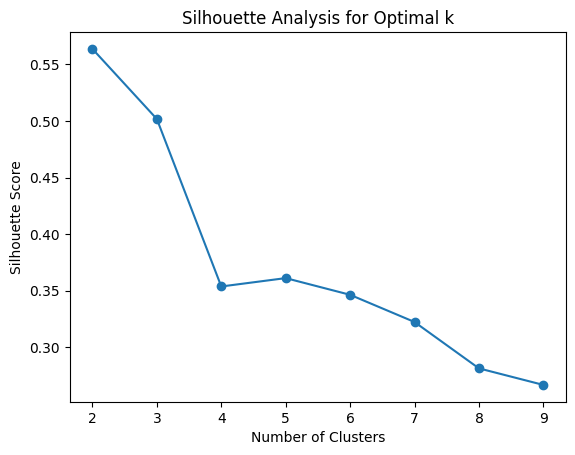

In [267]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming your data is in the 'df' DataFrame from the previous code

# Select features for clustering (exclude 'hasil')
features = ['kehamilan', 'glukosa', 'BloodPressure', 'TebalKulit', 'Insulin', 'BMI', 'PersenDiabet', 'usia']
X = df[features]

# Determine optimal number of clusters using silhouette score
silhouette_scores = []
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for Optimal k")
plt.show()

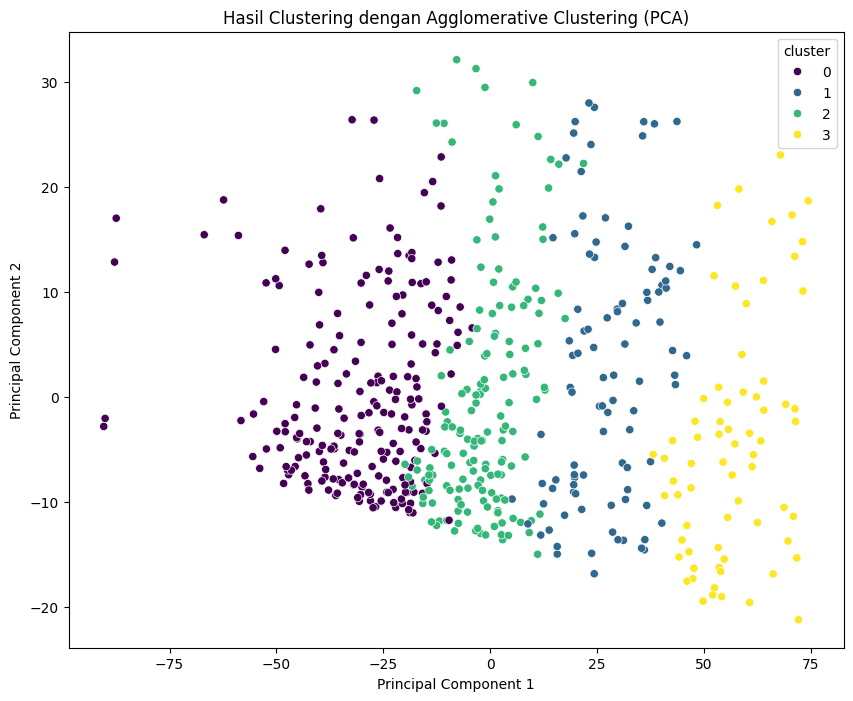

In [268]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

kolom_clustering = ['glukosa', 'BMI', 'usia', 'PersenDiabet', 'kehamilan']
X = df[kolom_clustering]

agg_clustering = AgglomerativeClustering(n_clusters=4)
df['cluster'] = agg_clustering.fit_predict(X)


pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X)

# Visualisasi hasil clustering dengan PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue='cluster', data=df, palette='viridis')
plt.title('Hasil Clustering dengan Agglomerative Clustering (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Silhouette Score: 0.29326982892800885

Cluster 0:
        kehamilan     glukosa  BloodPressure  TebalKulit     Insulin  \
count  211.000000  211.000000     211.000000  211.000000  211.000000   
mean     3.767773   95.104265      68.507109   19.843602   41.805687   
std      3.254024   14.848714      12.832759   14.606887   57.390767   
min      0.000000   36.000000      40.000000    0.000000    0.000000   
25%      1.000000   86.500000      60.000000    0.000000    0.000000   
50%      3.000000   97.000000      70.000000   23.000000    0.000000   
75%      6.000000  106.000000      78.000000   31.000000   76.500000   
max     14.000000  120.000000     104.000000   60.000000  258.000000   

              BMI  PersenDiabet        usia       hasil  cluster  
count  211.000000    211.000000  211.000000  211.000000    211.0  
mean    30.841232      0.463961   30.644550    0.251185      0.0  
std      6.864834      0.298486    8.770172    0.434726      0.0  
min     15.487500      0.084000  

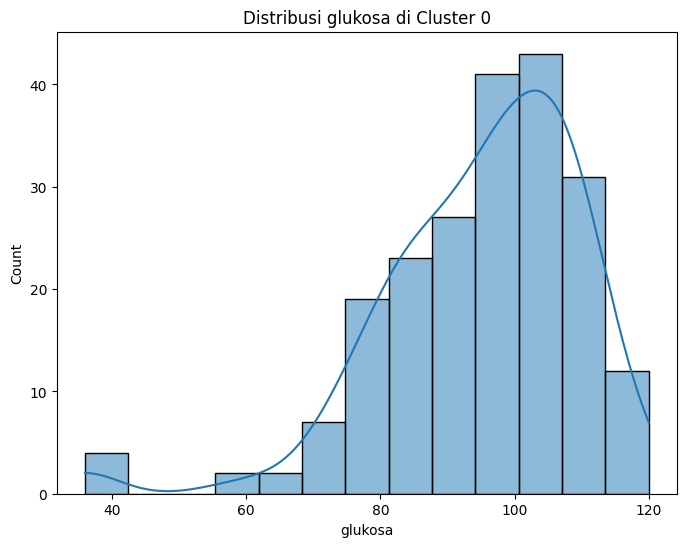

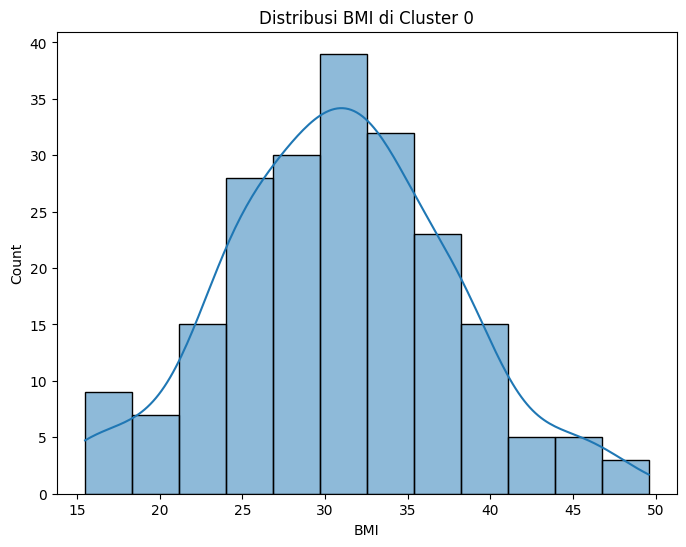

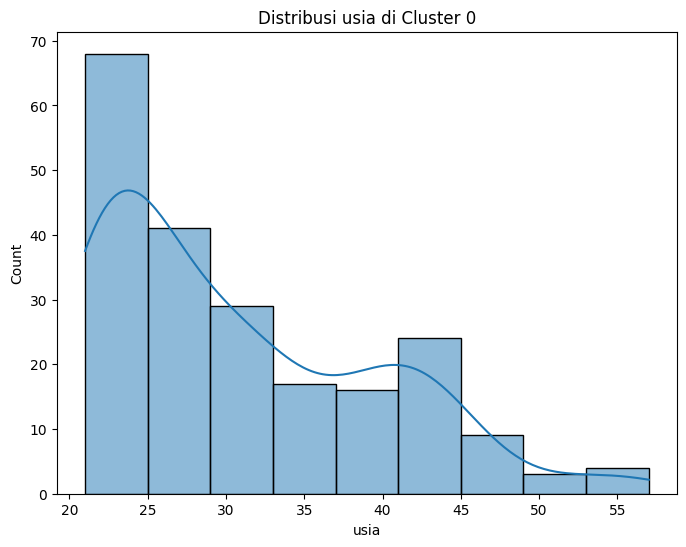

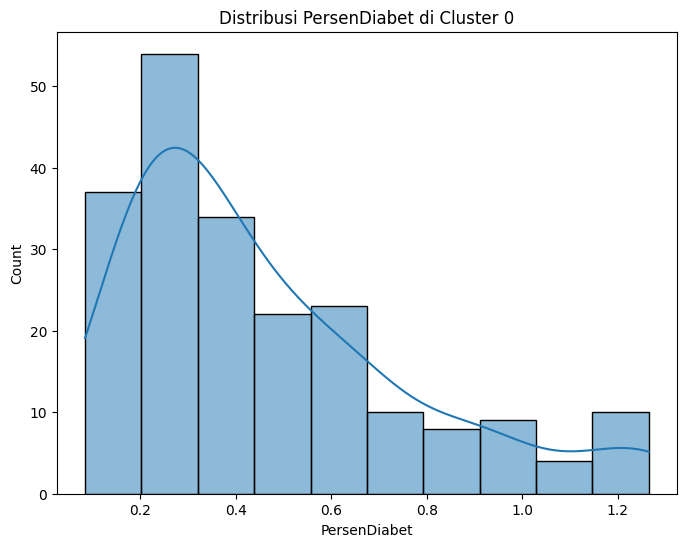

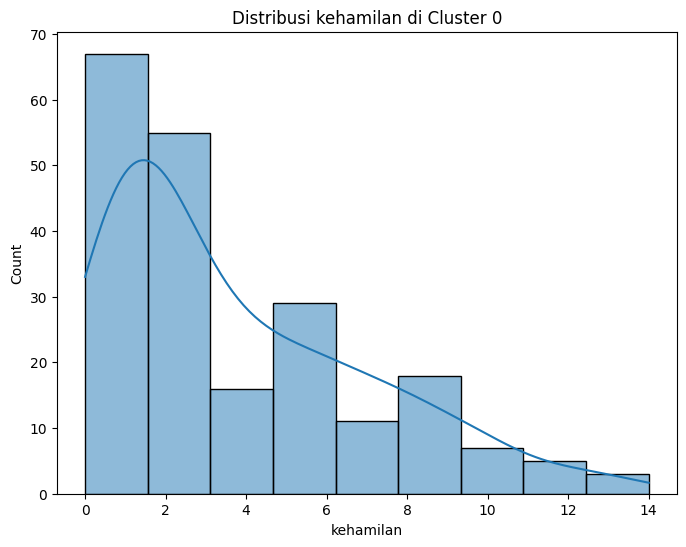


Cluster 2:
        kehamilan     glukosa  BloodPressure  TebalKulit     Insulin  \
count  159.000000  159.000000     159.000000  159.000000  159.000000   
mean     4.037736  124.069182      71.930818   19.528302   81.003145   
std      3.507473    8.146693      13.887486   16.738046   91.898612   
min      0.000000  105.000000      40.000000    0.000000    0.000000   
25%      1.000000  119.000000      64.000000    0.000000    0.000000   
50%      3.000000  124.000000      72.000000   22.000000   63.000000   
75%      6.000000  129.000000      80.000000   33.000000  153.500000   
max     15.000000  145.000000     104.000000   51.000000  331.875000   

              BMI  PersenDiabet        usia       hasil  cluster  
count  159.000000    159.000000  159.000000  159.000000    159.0  
mean    32.850472      0.475360   33.855346    0.477987      2.0  
std      6.411431      0.298771   11.545089    0.501093      0.0  
min     15.487500      0.088000   21.000000    0.000000      2.0  
25% 

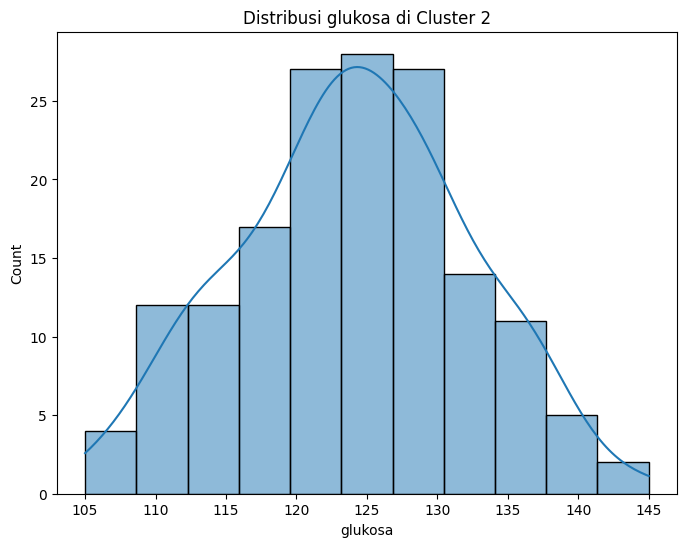

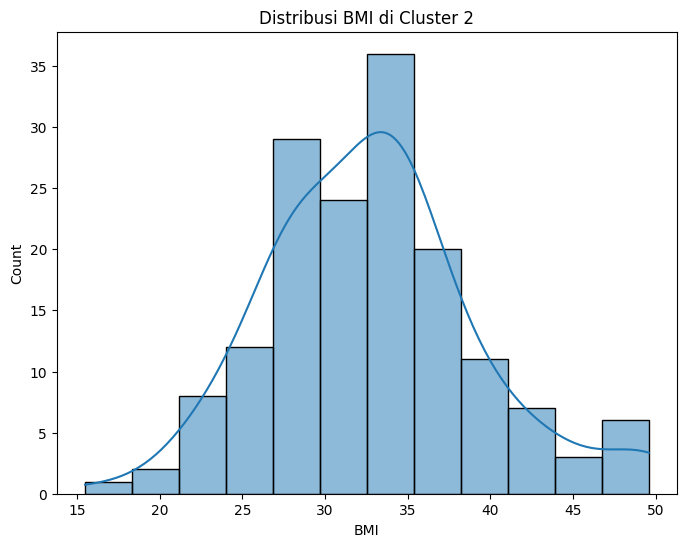

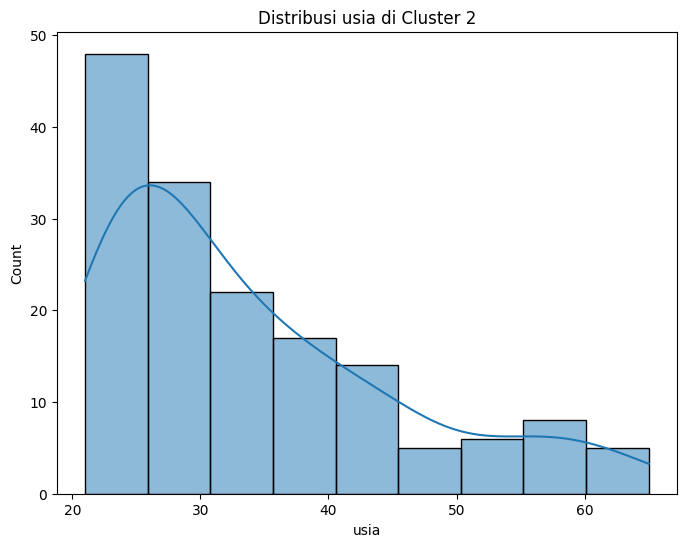

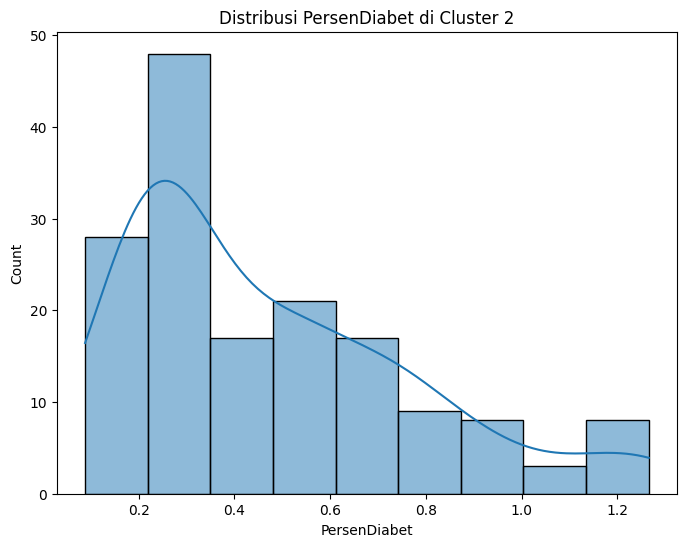

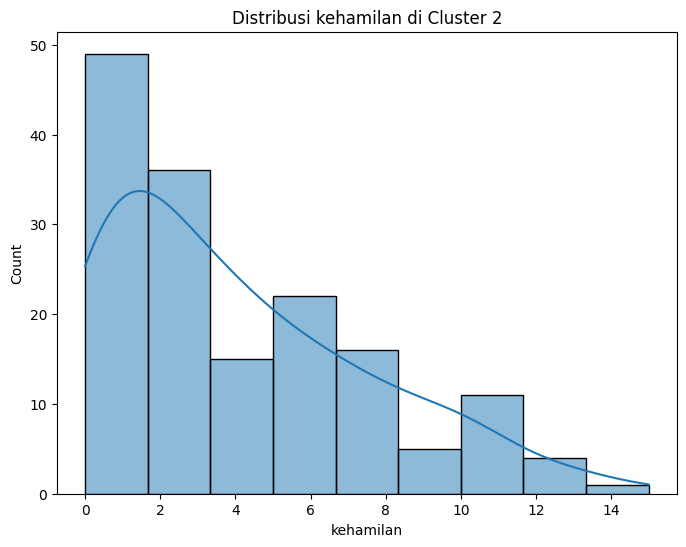


Cluster 3:
       kehamilan     glukosa  BloodPressure  TebalKulit     Insulin  \
count  69.000000   69.000000      69.000000   69.000000   69.000000   
mean    4.101449  182.507246      74.043478   24.456522  128.547101   
std     3.263636    9.119506      13.137771   17.849398  131.993900   
min     0.000000  164.000000      40.000000    0.000000    0.000000   
25%     1.000000  175.000000      68.000000    0.000000    0.000000   
50%     3.000000  181.000000      74.000000   28.000000  125.000000   
75%     7.000000  189.000000      84.000000   36.000000  249.000000   
max    14.000000  199.000000     104.000000   82.500000  331.875000   

             BMI  PersenDiabet       usia      hasil  cluster  
count  69.000000     69.000000  69.000000  69.000000     69.0  
mean   35.125906      0.577181  36.362319   0.913043      3.0  
std     5.795474      0.354866  11.604982   0.283836      0.0  
min    22.900000      0.088000  21.000000   0.000000      3.0  
25%    31.200000      0.2820

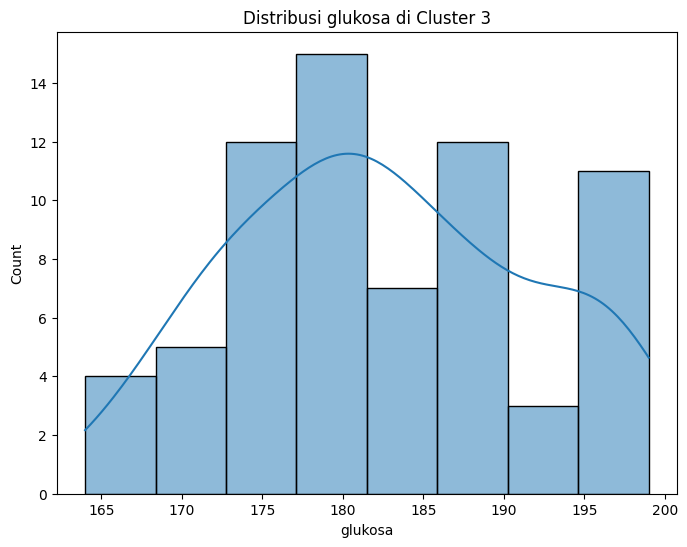

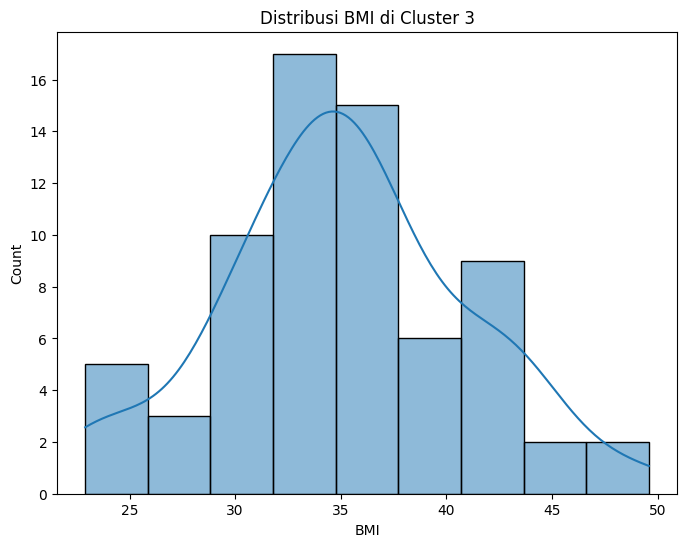

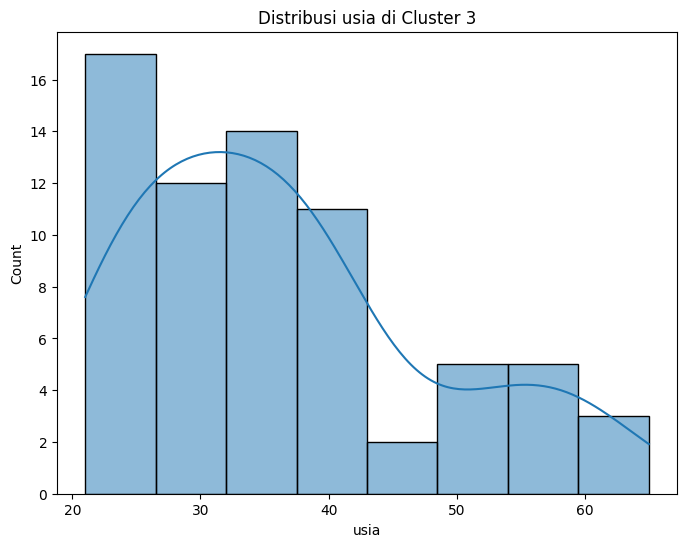

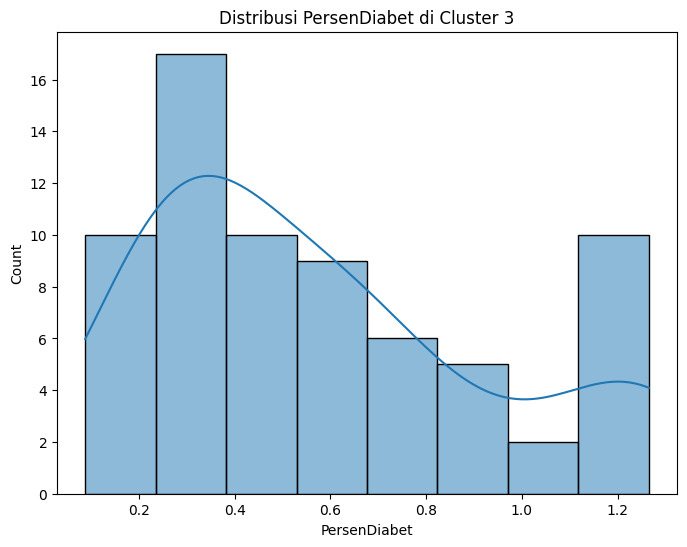

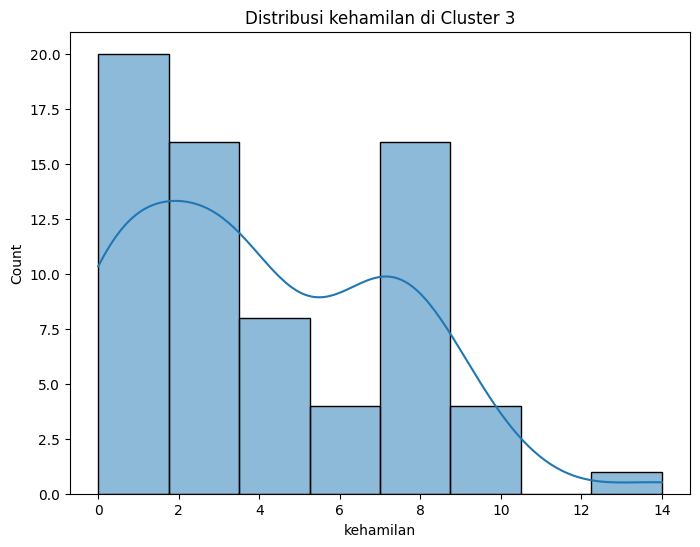


Cluster 1:
       kehamilan     glukosa  BloodPressure  TebalKulit     Insulin  \
count  97.000000   97.000000      97.000000   97.000000   97.000000   
mean    4.969072  152.319588      73.886598   20.979381   96.417526   
std     3.712180    9.287701      14.470427   17.047103  110.502175   
min     0.000000  131.000000      40.000000    0.000000    0.000000   
25%     2.000000  145.000000      68.000000    0.000000    0.000000   
50%     4.000000  152.000000      76.000000   26.000000   61.000000   
75%     8.000000  160.000000      82.000000   34.000000  168.000000   
max    16.000000  171.000000     104.000000   56.000000  331.875000   

             BMI  PersenDiabet       usia      hasil  cluster  
count  97.000000     97.000000  97.000000  97.000000     97.0  
mean   34.937758      0.471049  39.917526   0.783505      1.0  
std     6.614291      0.283753  12.574503   0.413995      0.0  
min    21.900000      0.123000  21.000000   0.000000      1.0  
25%    30.300000      0.2550

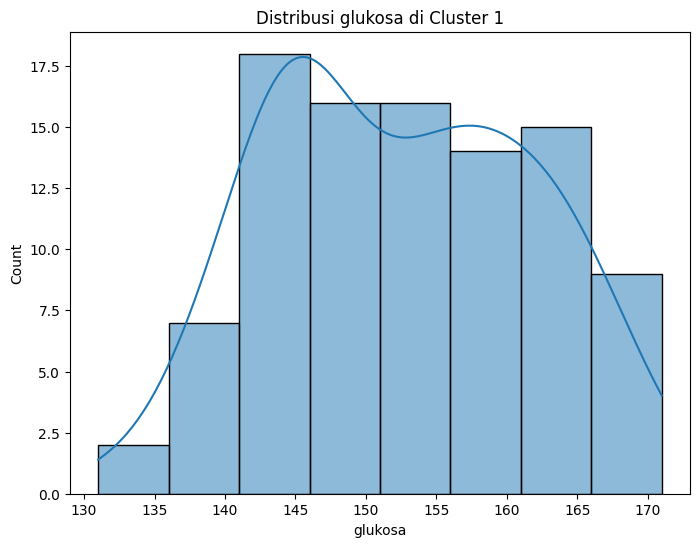

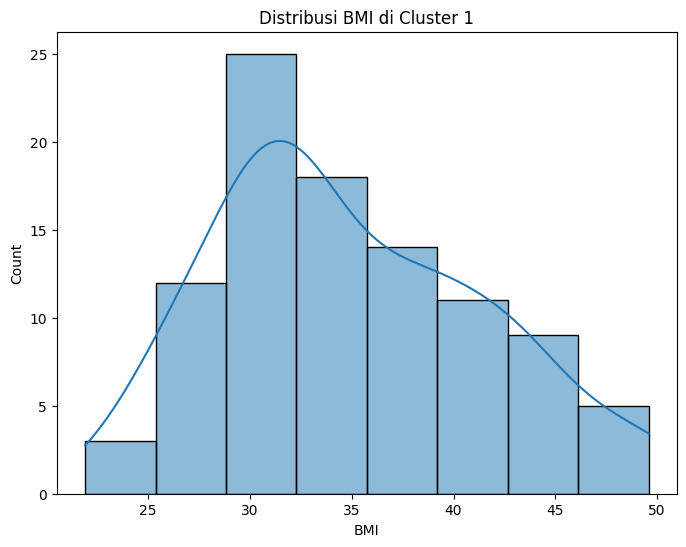

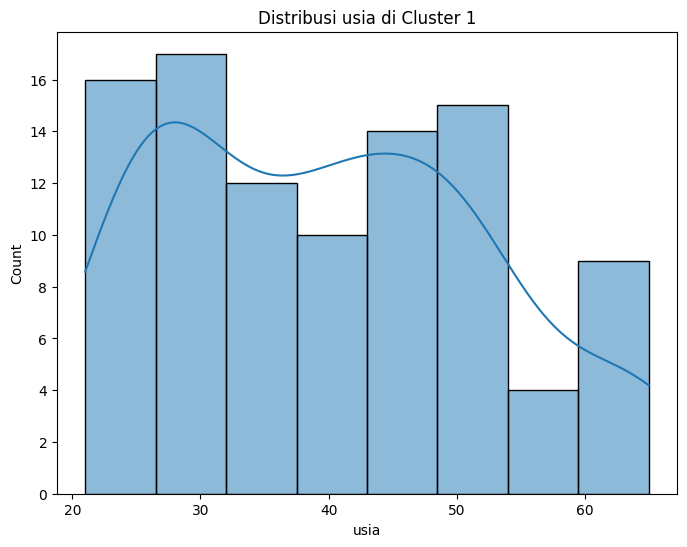

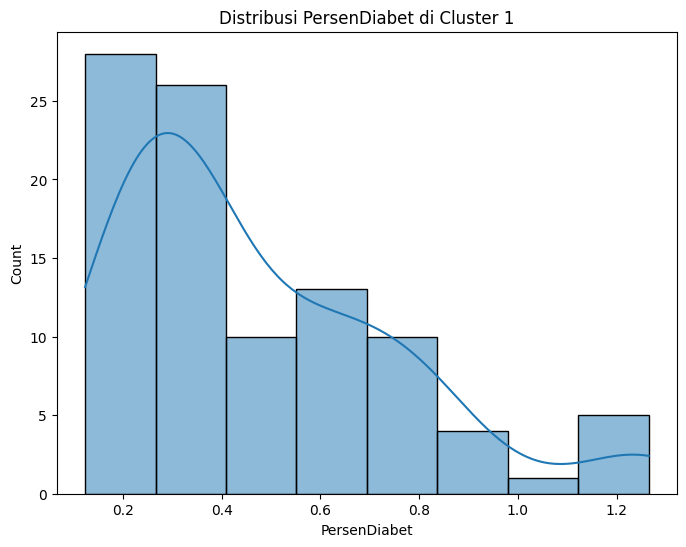

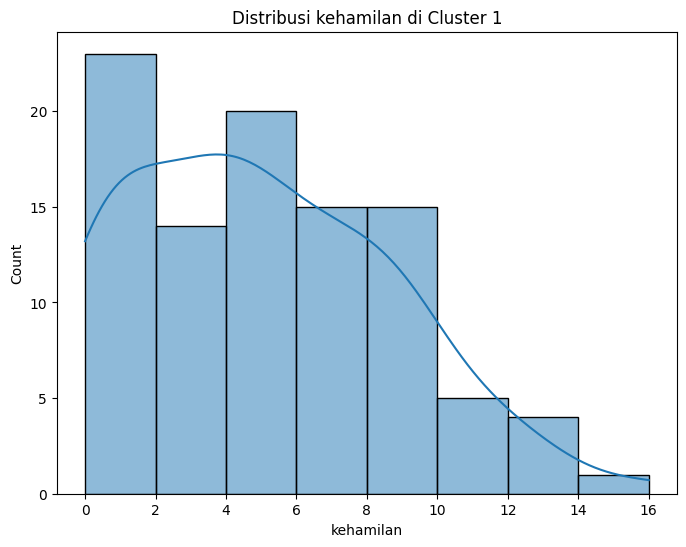

In [269]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, df['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

for cluster_label in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster_label]
    print(f"\nCluster {cluster_label}:")
    print(cluster_data.describe())
    for col in kolom_clustering:
      plt.figure(figsize=(8,6))
      sns.histplot(cluster_data[col], kde=True)
      plt.title(f'Distribusi {col} di Cluster {cluster_label}')
      plt.show()

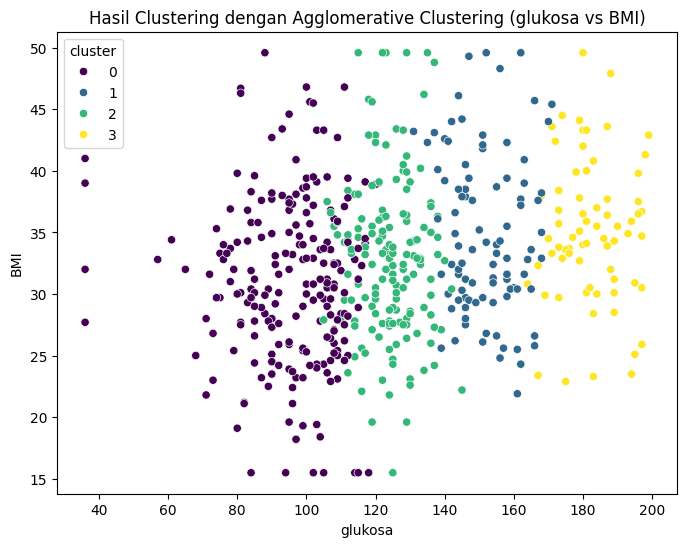

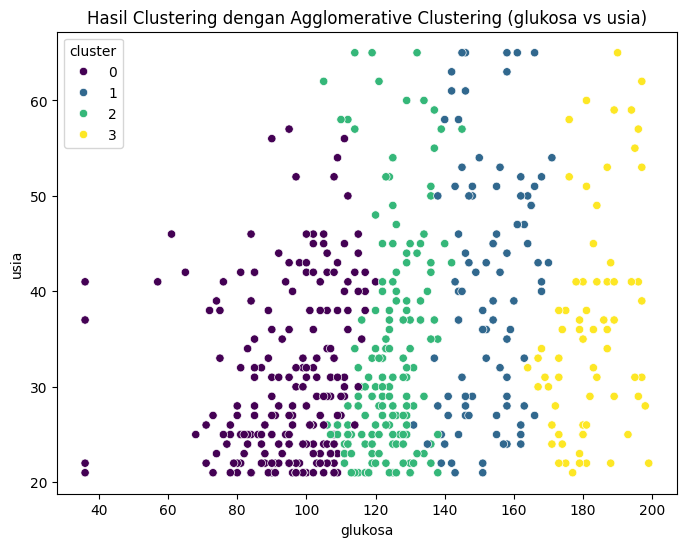

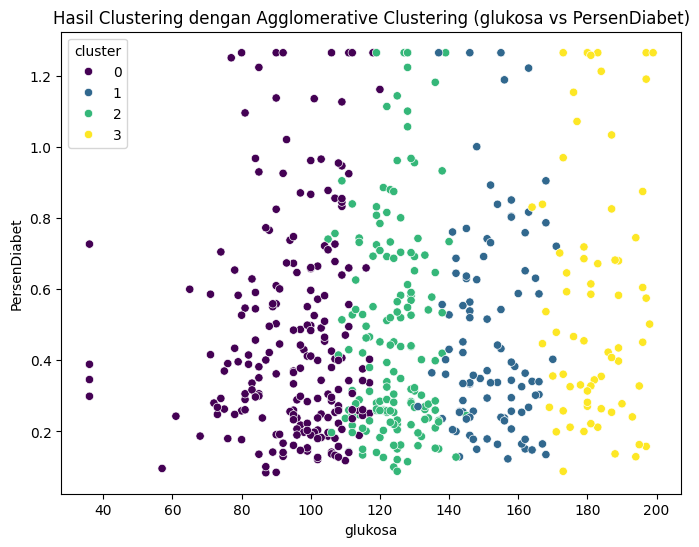

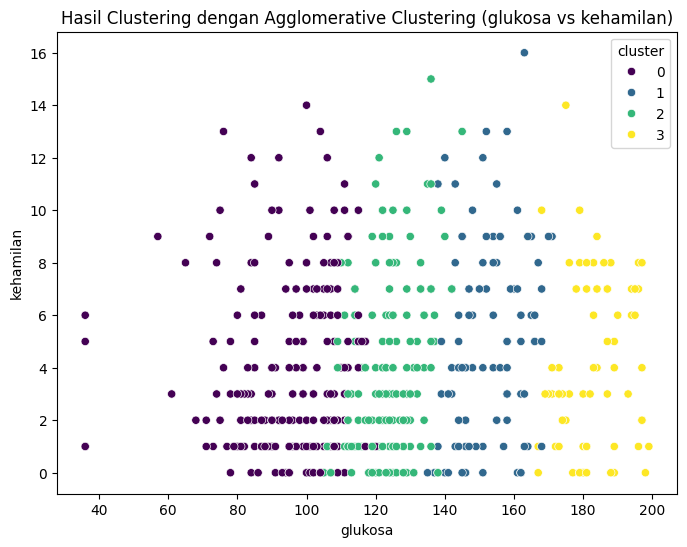

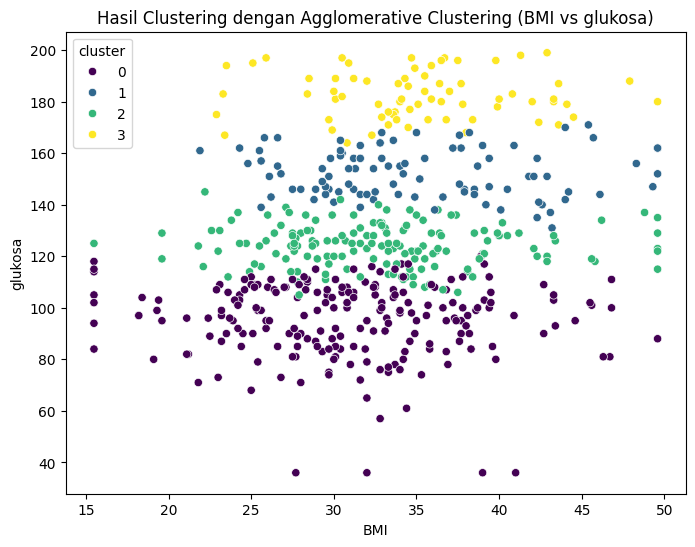

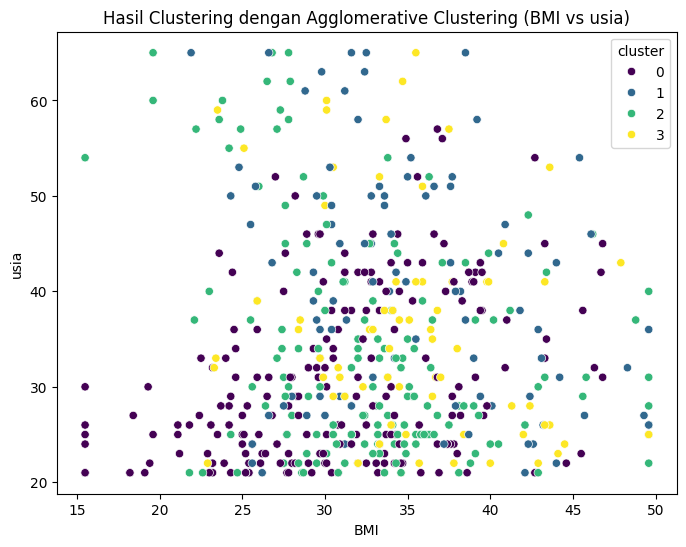

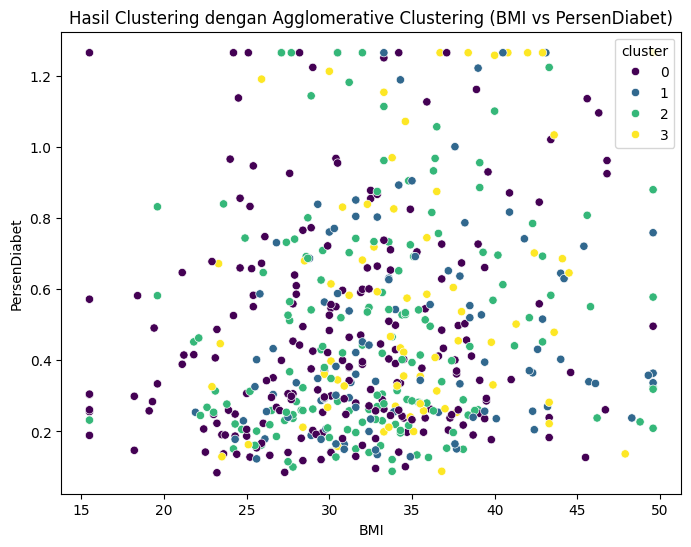

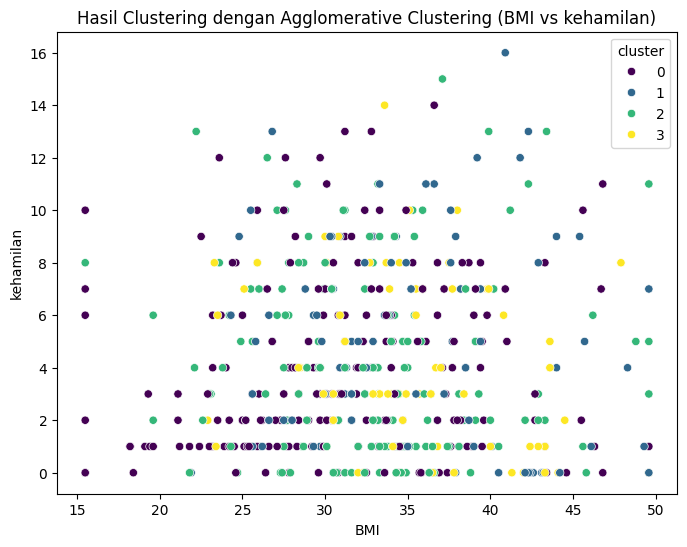

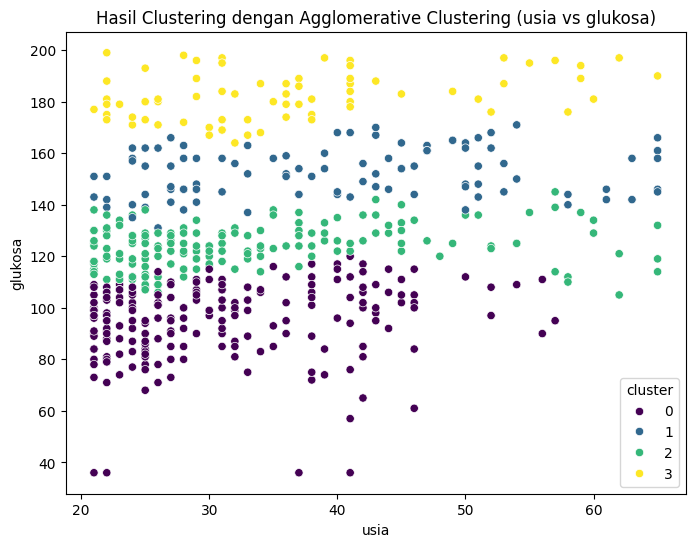

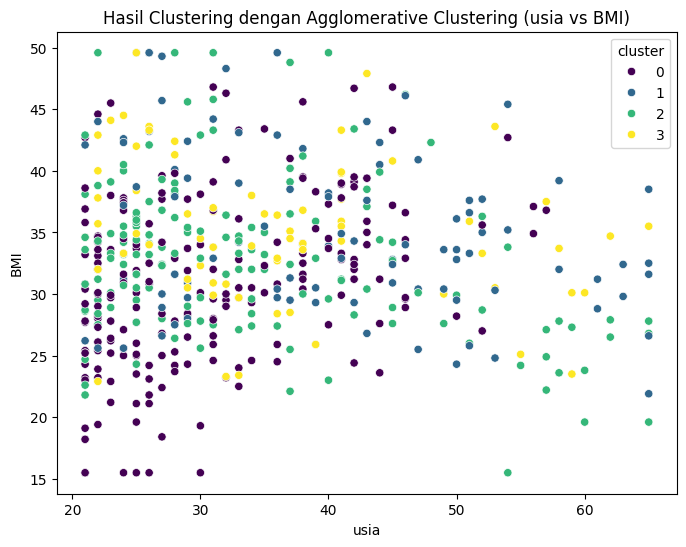

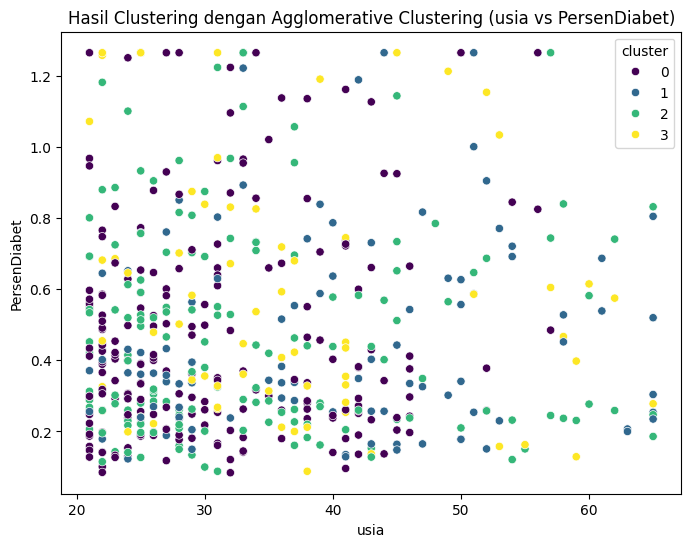

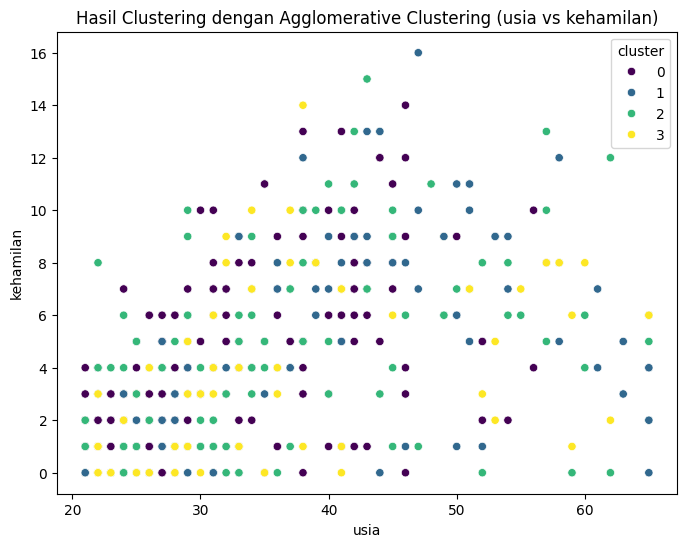

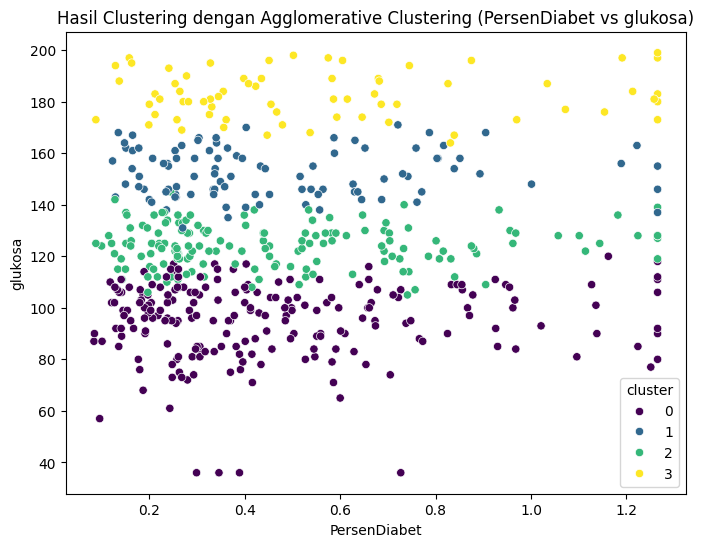

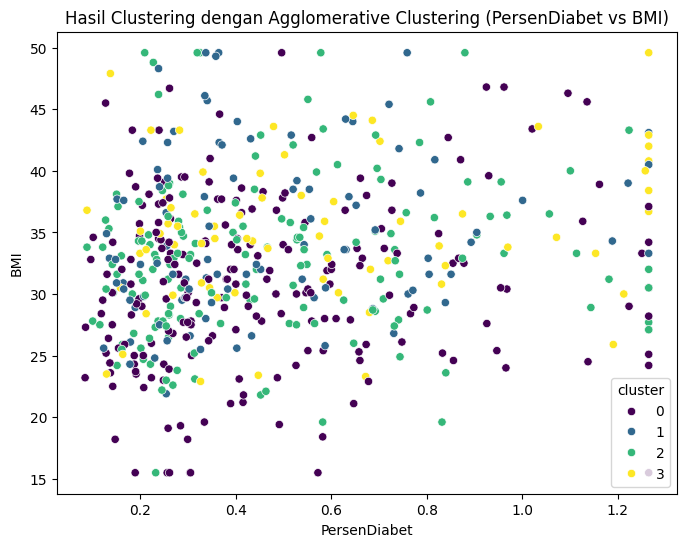

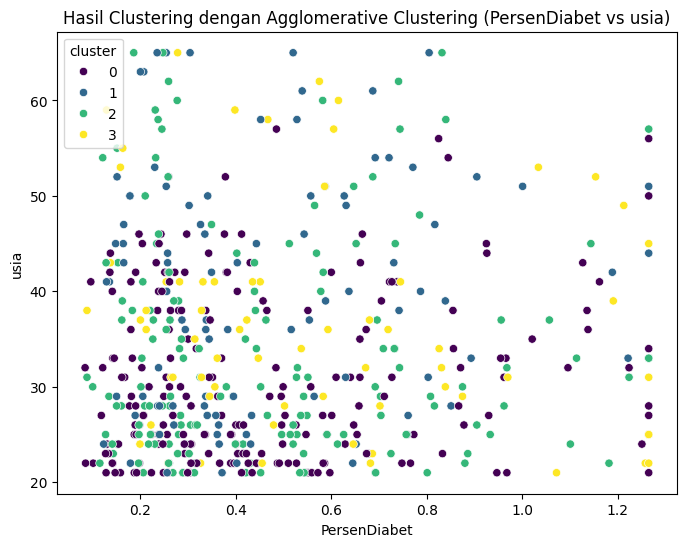

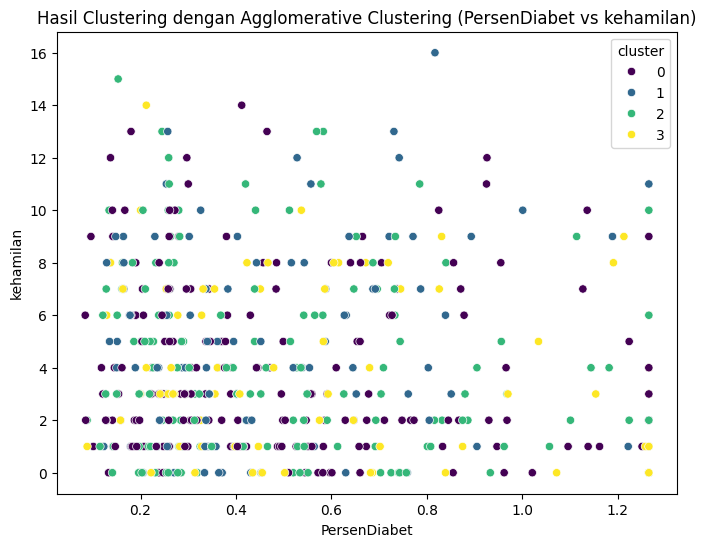

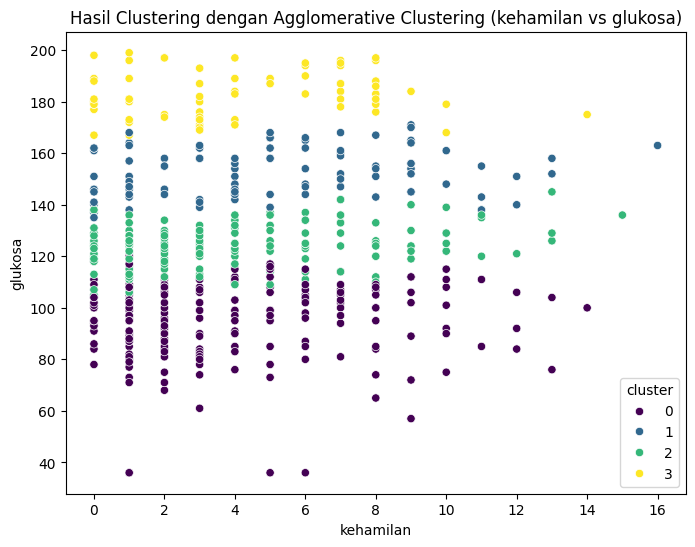

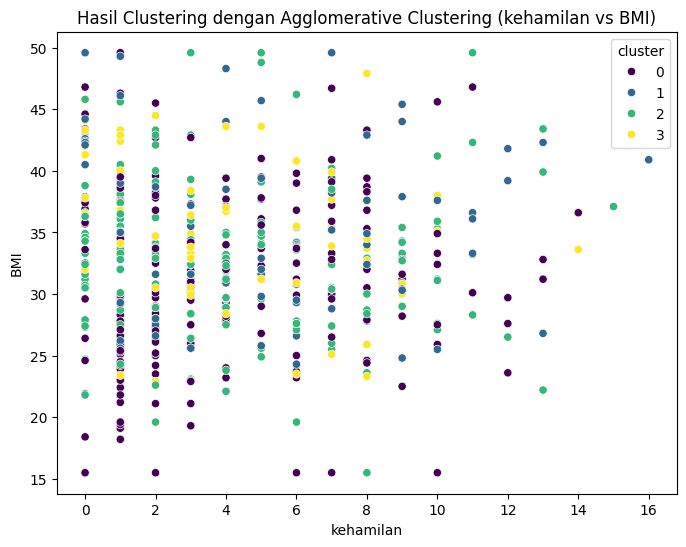

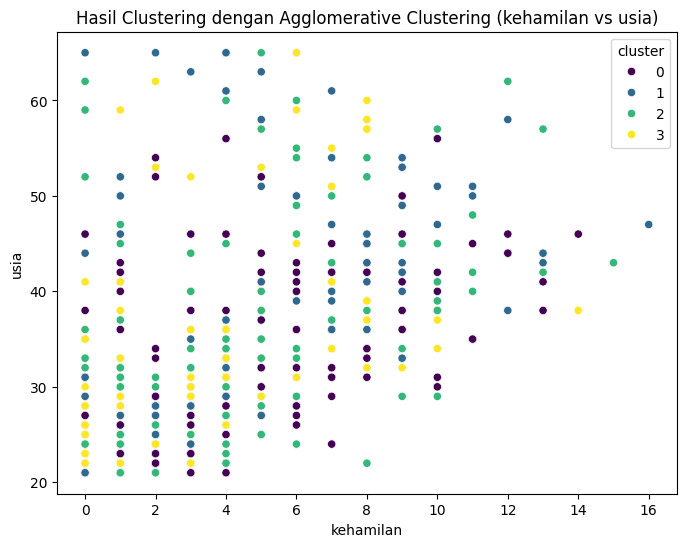

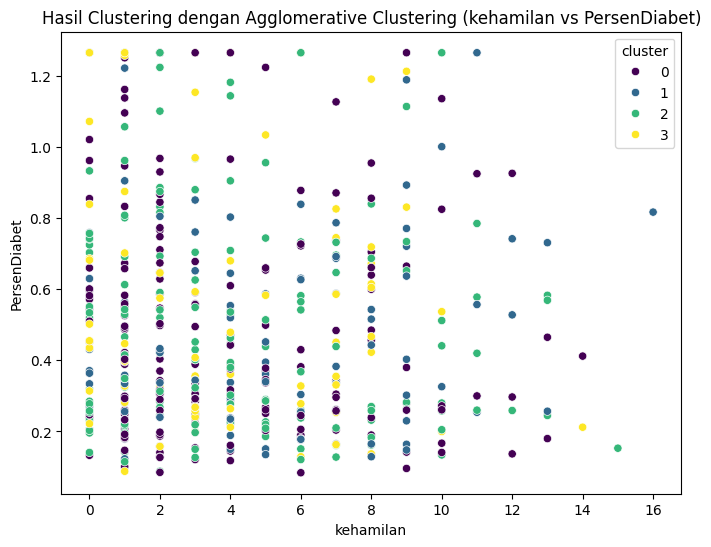

In [270]:
for col1 in kolom_clustering:
    for col2 in kolom_clustering:
        if col1 != col2:  # Jangan plot kolom yang sama
            plt.figure(figsize=(8, 6))
            sns.scatterplot(x=col1, y=col2, hue='cluster', data=df, palette='viridis')
            plt.title(f'Hasil Clustering dengan Agglomerative Clustering ({col1} vs {col2})')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.show()

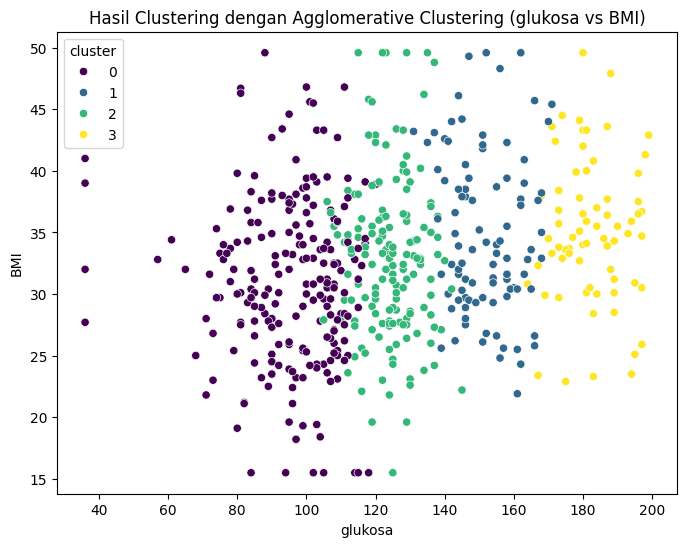

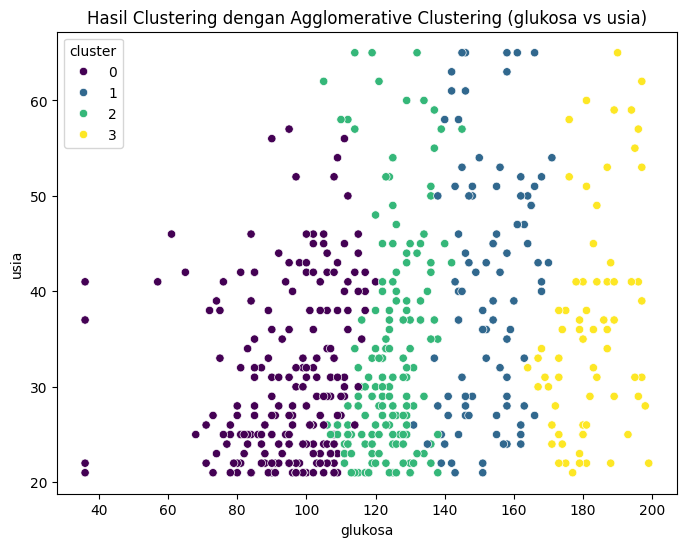

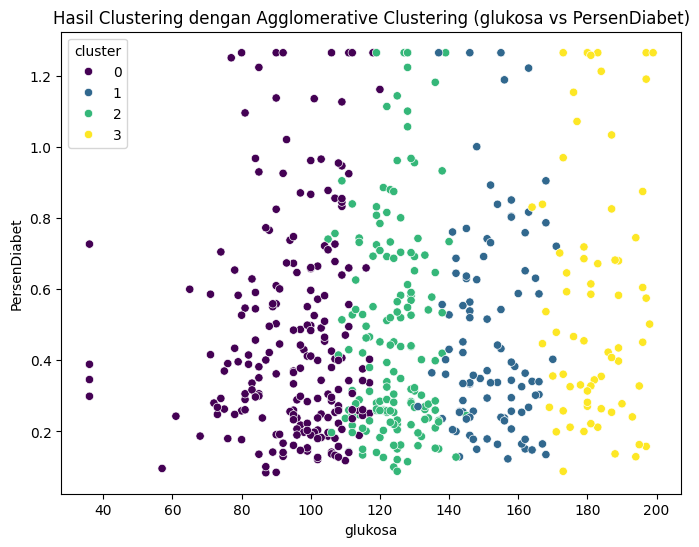

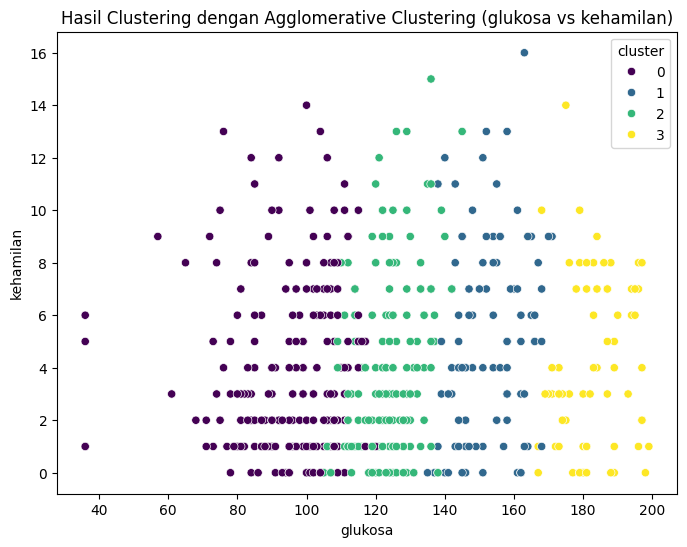

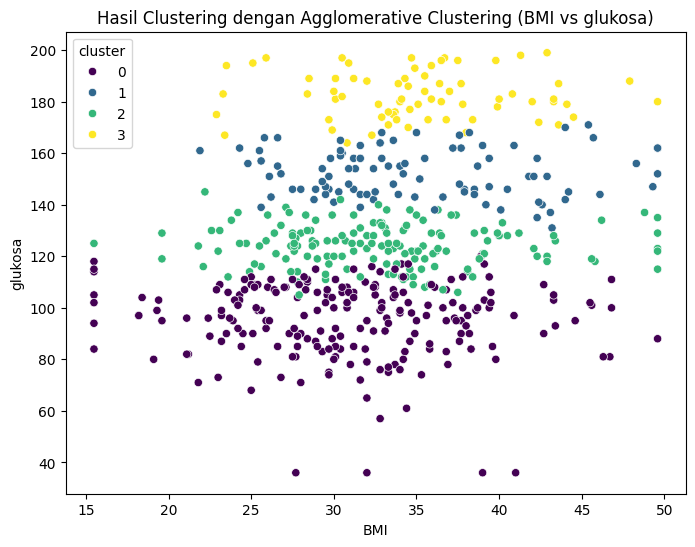

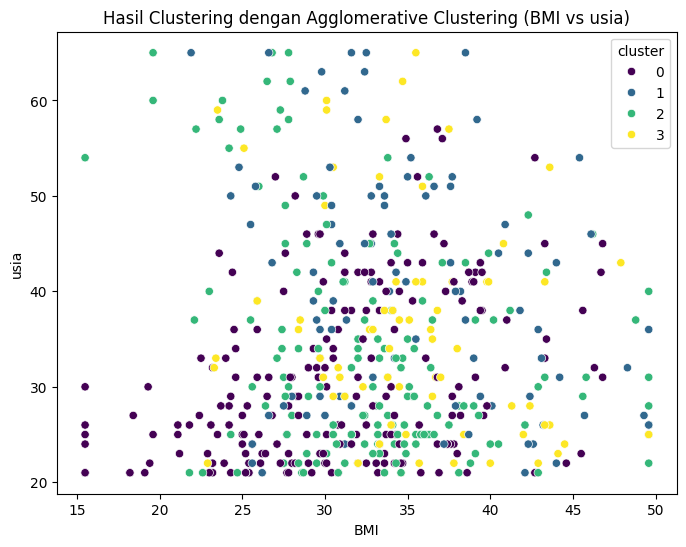

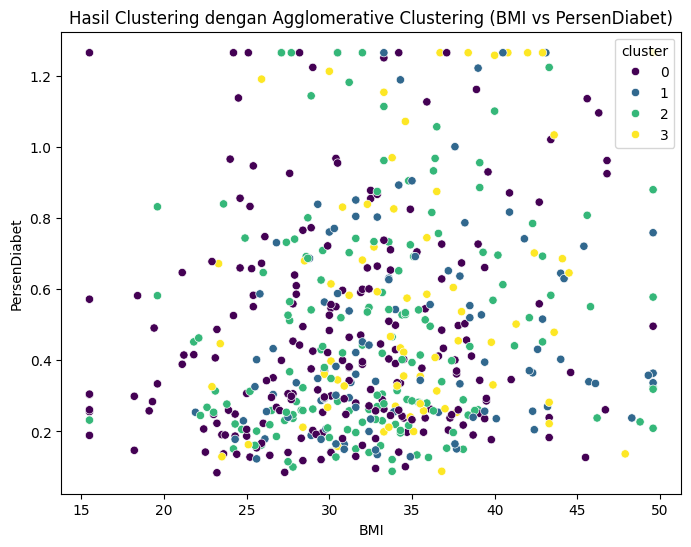

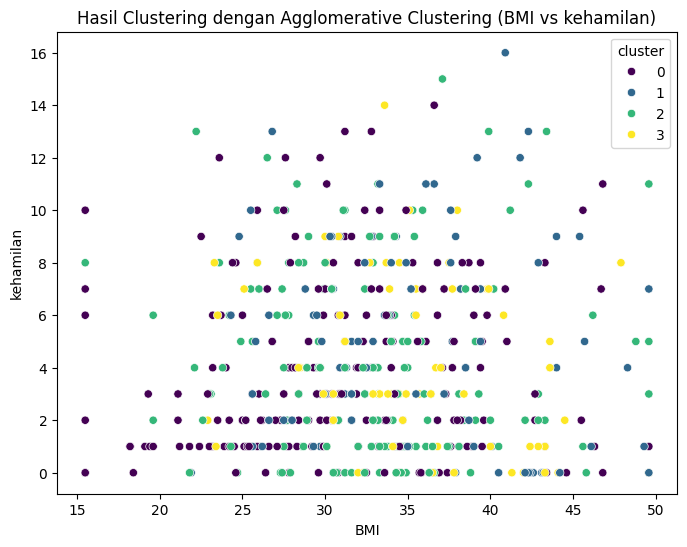

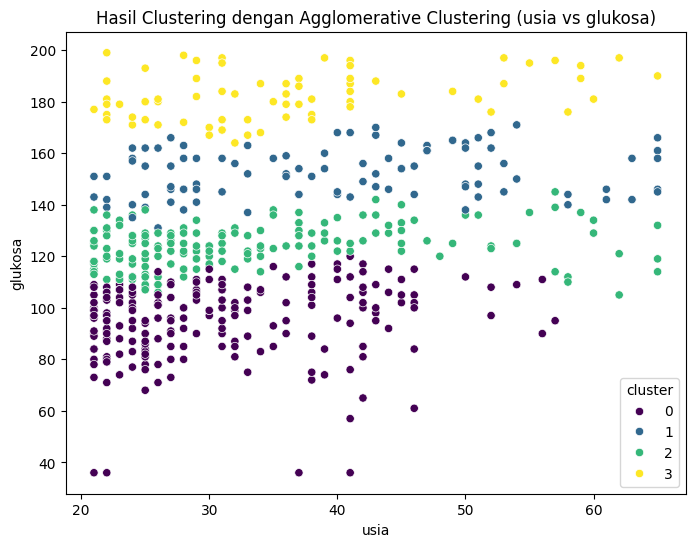

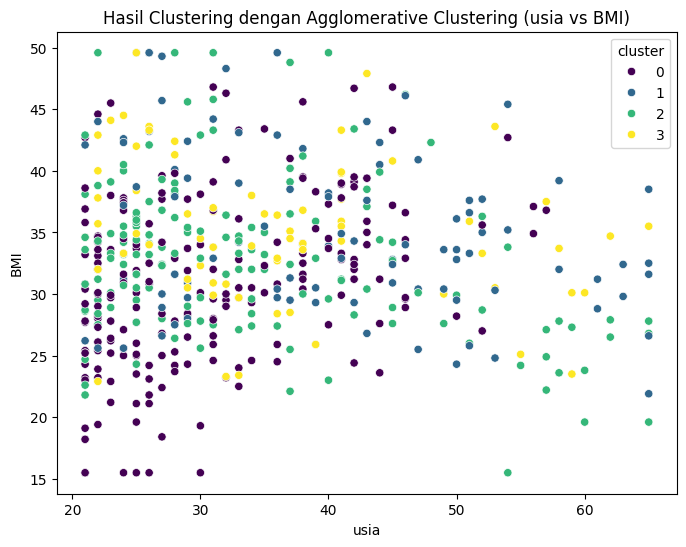

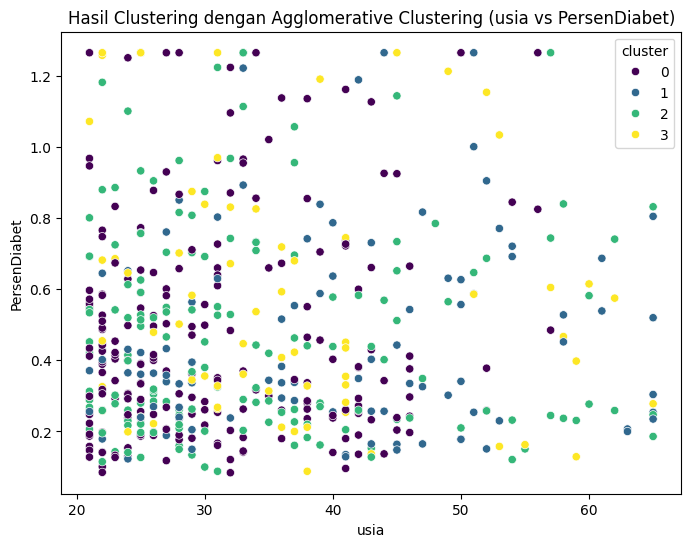

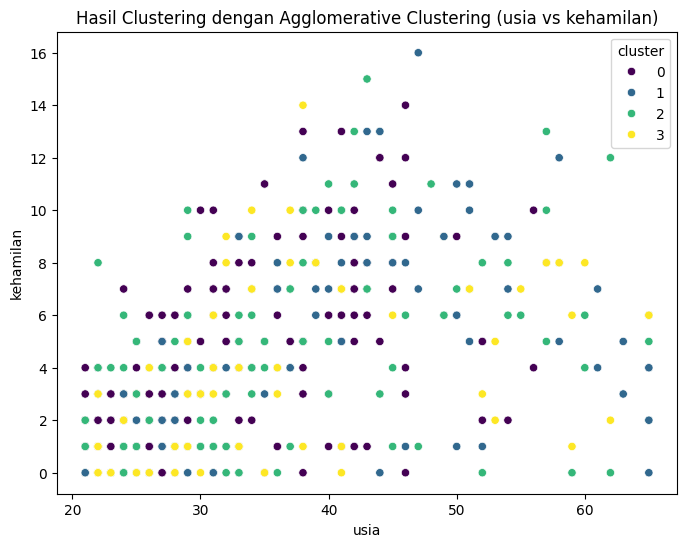

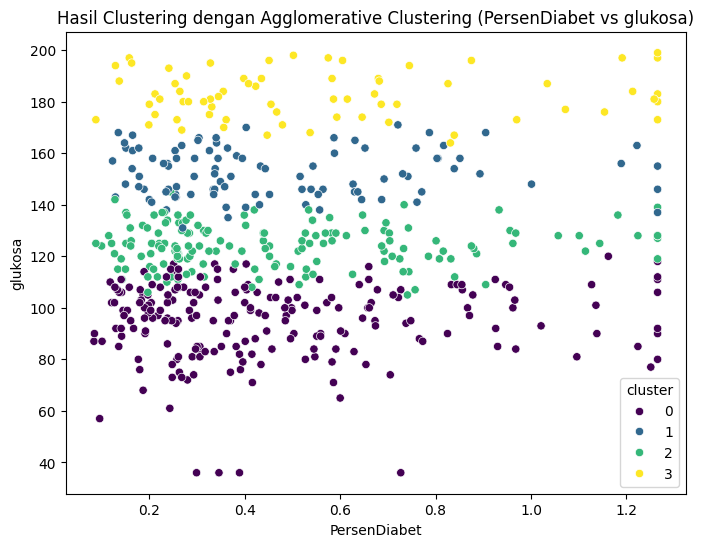

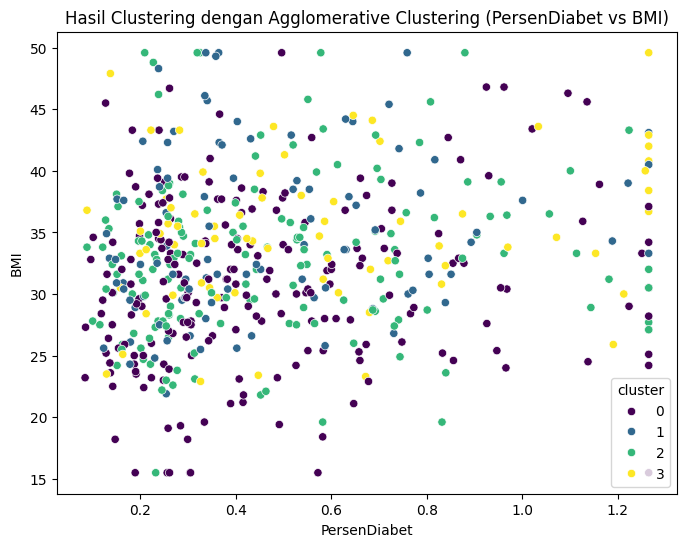

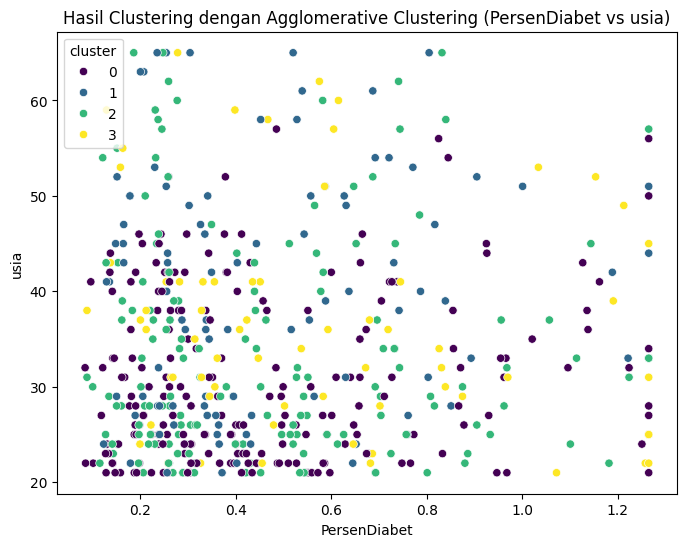

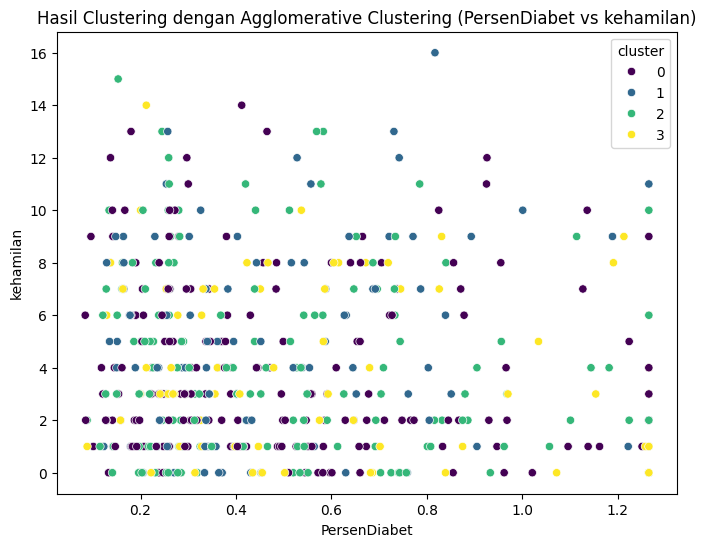

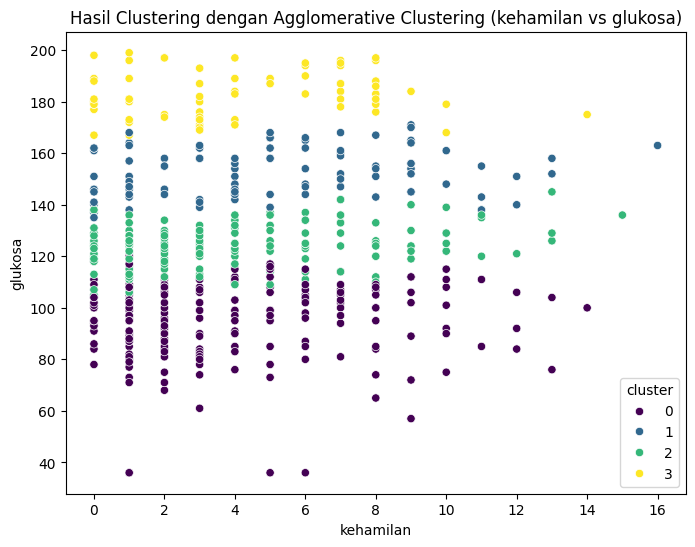

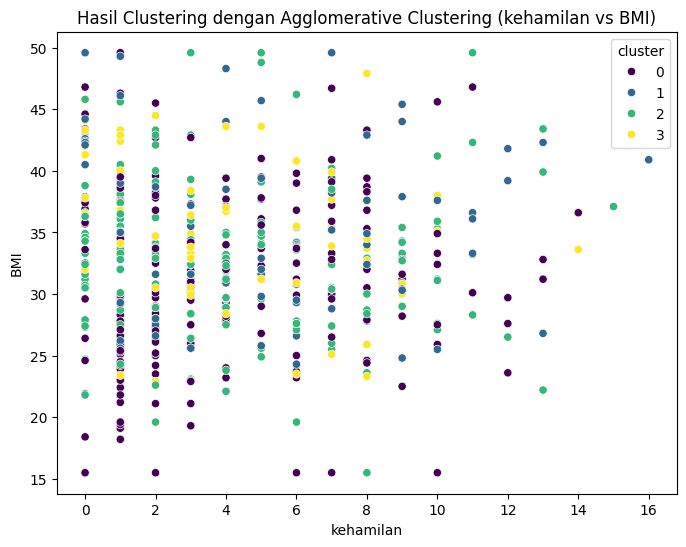

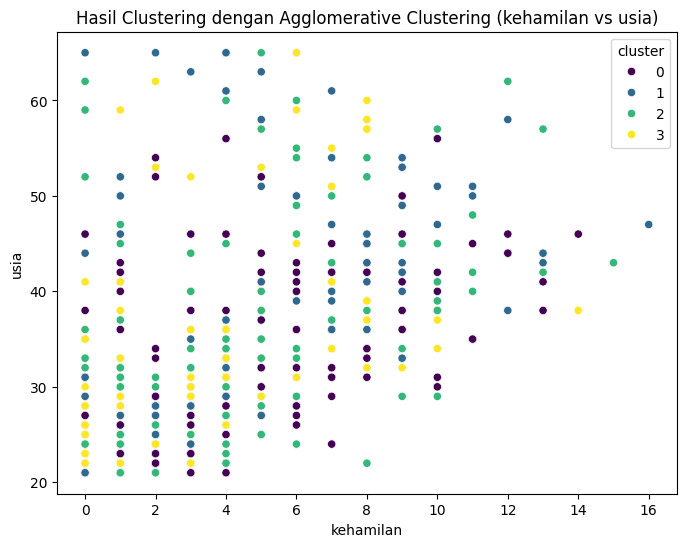

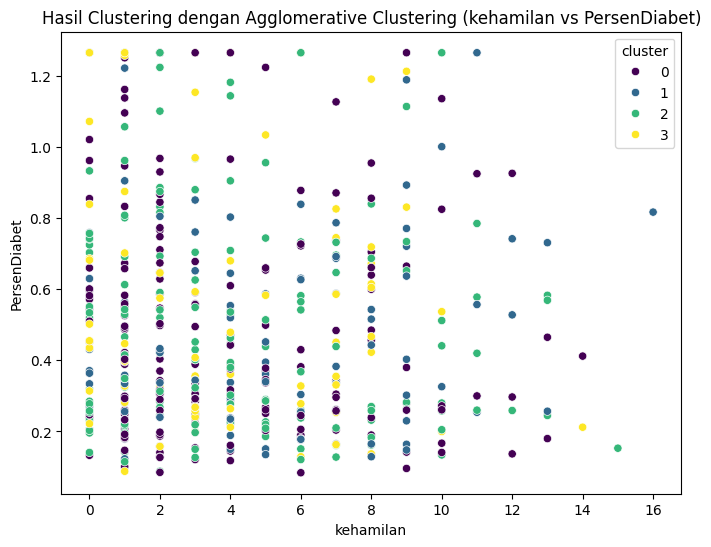

In [271]:
# prompt: visualisasikan model yang telah dievaluasi

import matplotlib.pyplot as plt
import seaborn as sns

# ... (your existing code)

# Visualisasi hasil clustering dengan berbagai fitur
for col1 in kolom_clustering:
    for col2 in kolom_clustering:
        if col1 != col2:  # Jangan plot kolom yang sama
            plt.figure(figsize=(8, 6))
            sns.scatterplot(x=col1, y=col2, hue='cluster', data=df, palette='viridis')
            plt.title(f'Hasil Clustering dengan Agglomerative Clustering ({col1} vs {col2})')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.show()

In [272]:
print(df.head(20).to_string(index=False))

 kehamilan  glukosa  BloodPressure  TebalKulit  Insulin  BMI  PersenDiabet  usia  hasil  cluster
       1.0     97.0           70.0        40.0      0.0 38.1       0.21800  30.0    0.0        0
       5.0     78.0           48.0         0.0      0.0 33.7       0.65400  25.0    0.0        0
       3.0    111.0           58.0        31.0     44.0 29.5       0.43000  22.0    0.0        2
       2.0    129.0           84.0         0.0      0.0 28.0       0.28400  27.0    0.0        2
       7.0    102.0           74.0        40.0    105.0 37.2       0.20400  45.0    0.0        0
       1.0    124.0           74.0        36.0      0.0 27.8       0.10000  30.0    0.0        2
       1.0    119.0           44.0        47.0     63.0 35.5       0.28000  25.0    0.0        2
       1.0    105.0           58.0         0.0      0.0 24.3       0.18700  21.0    0.0        0
       1.0     96.0          104.0         0.0      0.0 22.4       0.20700  27.0    0.0        0
       3.0    130.0           

In [273]:
cluster_0_data = df[df['cluster'] == 0].sample(25)
print(cluster_0_data.to_string(index=False))

 kehamilan  glukosa  BloodPressure  TebalKulit  Insulin     BMI  PersenDiabet  usia  hasil  cluster
       5.0    117.0           92.0         0.0      0.0 34.1000         0.337  38.0    0.0        0
       3.0    111.0           56.0        39.0      0.0 30.1000         0.557  30.0    0.0        0
       5.0    112.0           66.0         0.0      0.0 37.8000         0.261  41.0    1.0        0
       5.0     99.0           74.0        27.0      0.0 29.0000         0.203  32.0    0.0        0
       2.0     90.0           60.0         0.0      0.0 23.5000         0.191  25.0    0.0        0
       6.0    105.0           80.0        28.0      0.0 32.5000         0.878  26.0    0.0        0
       7.0     94.0           64.0        25.0     79.0 33.3000         0.738  41.0    0.0        0
       9.0    106.0           52.0         0.0      0.0 31.2000         0.380  42.0    0.0        0
       1.0     97.0           64.0        19.0     82.0 18.2000         0.299  21.0    0.0        0


In [274]:
cluster_1_data = df[df['cluster'] == 1].sample(25)
print(cluster_1_data.to_string(index=False))

 kehamilan  glukosa  BloodPressure  TebalKulit  Insulin  BMI  PersenDiabet  usia  hasil  cluster
       0.0    146.0           82.0         0.0      0.0 40.5       1.26525  44.0    0.0        1
       1.0    143.0           74.0        22.0     61.0 26.2       0.25600  21.0    0.0        1
       0.0    137.0           40.0        35.0    168.0 43.1       1.26525  33.0    1.0        1
      11.0    138.0           74.0        26.0    144.0 36.1       0.55700  50.0    1.0        1
       1.0    168.0           88.0        29.0      0.0 35.0       0.90500  52.0    1.0        1
       6.0    148.0           72.0        35.0      0.0 33.6       0.62700  50.0    1.0        1
       9.0    145.0           88.0        34.0    165.0 30.3       0.77100  53.0    1.0        1
       9.0    156.0           86.0        28.0    155.0 34.3       1.18900  42.0    1.0        1
       5.0    144.0           82.0        26.0    285.0 32.0       0.45200  58.0    1.0        1
       5.0    158.0           

In [275]:
cluster_2_data = df[df['cluster'] == 2].sample(25)
print(cluster_2_data.to_string(index=False))

 kehamilan  glukosa  BloodPressure  TebalKulit  Insulin     BMI  PersenDiabet  usia  hasil  cluster
       7.0    133.0           84.0         0.0    0.000 40.2000         0.696  37.0    0.0        2
       1.0    117.0           60.0        23.0  106.000 33.8000         0.466  27.0    0.0        2
       8.0    124.0           76.0        24.0  331.875 28.7000         0.687  52.0    1.0        2
       6.0    137.0           61.0         0.0    0.000 24.2000         0.151  55.0    0.0        2
       3.0    112.0           74.0        30.0    0.000 31.6000         0.197  25.0    1.0        2
       2.0    128.0           78.0        37.0  182.000 43.3000         1.224  31.0    1.0        2
       4.0    123.0           80.0        15.0  176.000 32.0000         0.443  34.0    0.0        2
       3.0    132.0           80.0         0.0    0.000 34.4000         0.402  44.0    1.0        2
       9.0    122.0           56.0         0.0    0.000 33.3000         1.114  33.0    1.0        2


In [276]:
cluster_3_data = df[df['cluster'] == 3].sample(25)
print(cluster_3_data.to_string(index=False))

 kehamilan  glukosa  BloodPressure  TebalKulit  Insulin     BMI  PersenDiabet  usia  hasil  cluster
       3.0    174.0           58.0        22.0  194.000 32.9000       0.59300  36.0    1.0        3
       0.0    180.0           78.0        63.0   14.000 49.5875       1.26525  25.0    1.0        3
       5.0    189.0           64.0        33.0  325.000 31.2000       0.58300  29.0    1.0        3
       1.0    199.0           76.0        43.0    0.000 42.9000       1.26525  22.0    1.0        3
       7.0    195.0           70.0        33.0  145.000 25.1000       0.16300  55.0    1.0        3
       1.0    181.0           78.0        42.0  293.000 40.0000       1.25800  22.0    1.0        3
       1.0    172.0           68.0        49.0  331.875 42.4000       0.70200  28.0    1.0        3
       3.0    169.0           74.0        19.0  125.000 29.9000       0.26800  31.0    1.0        3
       8.0    176.0           90.0        34.0  300.000 33.7000       0.46700  58.0    1.0        3


In [277]:
import joblib
joblib.dump(pca, 'pca_model.pkl')

print("Model PCA object saved successfully!")

Model PCA object saved successfully!
